<a href="https://colab.research.google.com/github/sadikinisaac/sadikinisaac/blob/master/Week_13_classificationIsaacSadikin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Files Needed

In [1]:
import requests

filename = 'data-week-13.zip'
url = f'https://d17lzt44idt8rf.cloudfront.net/{filename}'
response = requests.get(url)

# Make sure the request was successful
if response.status_code == 200:

  # Write the content to a file
  with open(filename, 'wb') as f:
      f.write(response.content)

In [2]:
!unzip $filename

Archive:  data-week-13.zip
   creating: 00_raw_data/
  inflating: 00_raw_data/df_hdb_resale_info_distance.csv  
  inflating: 00_raw_data/hdb_block_info.xlsx  
  inflating: 00_raw_data/hdb_flat_info_by_address.csv  
  inflating: 00_raw_data/hdb_flat_type_sold_by_address.csv  


# Table of Contents
<!--TABLE OF CONTENTS-->
- [Classification Method](#Classification-Method)
- [1.0 Loading Data](#1.0-Loading-Data)
  - [1.1 Loading Main Dataset](#1.1-Loading-Main-Dataset)
  - [1.2 Loading Additional Datasets](#1.2-Loading-Additional-Datasets)
- [2.0 Data Processing](#2.0-Data-Processing)
  - [2.1 Combining the secondary datasets](#2.1-Combining-the-secondary-datasets)
  - [2.2 Combining the Main dataset with the secondary datasets](#2.2-Combining-the-Main-dataset-with-the-secondary-datasets)
- [3 Feature Engineering](#3-Feature-Engineering)
  - [Creating Dummy Variables](#Creating-Dummy-Variables)
- [4.0 Model Training and Testing](#4.0-Model-Training-and-Testing)
  - [4.1 Creating the Target for Prediction](#4.1-Creating-the-Target-for-Prediction)
  - [4.2 Specifying the Features and Splitting Training Data](#4.2-Specifying-the-Features-and-Splitting-Training-Data)
  - [4.3 Logistic Regression](#4.3-Logistic-Regression)
  - [4.1 Random Tree Forest](#4.1-Random-Tree-Forest)
  - [4.3 Your Model of Choice](#4.3-Your-Model-of-Choice)
    - [4.3.1 Model A](#4.3.1-Model-A)
    - [4.3.2. Model B](#4.3.2.-Model-B)
- [Extra Learning: Adjusting Prediction with Decision Threshold](#Extra-Learning:-Adjusting-Prediction-with-Decision-Threshold)
- [Appendix: Template Codes for "Standardizing the Features"](#Appendix:-Template-Codes-for-"Standardizing-the-Features")
  - [When it's benefiical to use 'StandardScaler'](#When-it's-benefiical-to-use-'StandardScaler')
  - [Example Codes](#Example-Codes)
  - [Demystifying "Standard Scaler "](#Demystifying-"Standard-Scaler-")

# Classification Method

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Settings for Matplotlib (& Seaborn)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import libraries for charting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of charts
plt.rc('figure', figsize=(16,9))
plt.style.use('fivethirtyeight')
sns.set_context(context={'figure.figsize': (16,9)})

# 1.0 Loading Data

## 1.1 Loading Main Dataset

> Load the data from **00_raw_data** folder

In [9]:
df = pd.read_csv('00_raw_data/df_hdb_resale_info_distance.csv')

> Show 15 random records from data

In [10]:
df.sample(15)

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
168889,2014-02,2014,2,SENGKANG,4 ROOM,273B,COMPASSVALE LINK,07 TO 09,90.0,Premium Apartment,...,767.549523,0.0,3.0,8.0,1711.120314,0.0,0.0,1.0,40,0
73382,2018-09,2018,9,TAMPINES,5 ROOM,160,SIMEI RD,04 TO 06,122.0,Improved,...,788.495536,0.0,1.0,5.0,1678.964658,0.0,0.0,1.0,45,99
51748,2017-09,2017,9,SENGKANG,EXECUTIVE,202A,COMPASSVALE DR,13 TO 15,130.0,Apartment,...,460.746638,1.0,1.0,8.0,1868.213869,0.0,0.0,1.0,40,0
163987,2013-10,2013,10,CLEMENTI,4 ROOM,117,CLEMENTI ST 13,04 TO 06,104.0,Model A,...,1234.623464,0.0,0.0,5.0,1120.235200,0.0,0.0,5.0,18,96
108788,2020-06,2020,6,PUNGGOL,4 ROOM,209B,PUNGGOL PL,01 TO 03,92.0,Model A,...,754.431110,0.0,2.0,6.0,3394.560772,0.0,0.0,0.0,40,0
177611,2014-09,2014,9,BEDOK,3 ROOM,41,CHAI CHEE ST,10 TO 12,67.0,New Generation,...,413.969710,3.0,4.0,4.0,546.586608,0.0,4.0,8.0,42,134
54613,2017-11,2017,11,GEYLANG,5 ROOM,42,CIRCUIT RD,04 TO 06,127.0,Improved,...,1140.933381,0.0,0.0,6.0,132.637319,3.0,4.0,8.0,106,0
136187,2012-05,2012,5,BUKIT TIMAH,5 ROOM,1,QUEEN'S RD,21 TO 25,123.0,Standard,...,1475.215466,0.0,0.0,1.0,161.416299,1.0,1.0,5.0,40,68
39058,2017-02,2017,2,TAMPINES,3 ROOM,879,TAMPINES AVE 8,07 TO 09,74.0,Model A,...,1290.591464,0.0,0.0,5.0,1295.348217,0.0,0.0,3.0,42,0
131235,2012-03,2012,3,ANG MO KIO,5 ROOM,350,ANG MO KIO ST 32,11 TO 15,110.0,Improved,...,651.387929,0.0,1.0,4.0,198.421006,1.0,3.0,11.0,32,86


## 1.2 Loading Additional Datasets


🔷**TASK**

> Read the csv file **hdb_flat_info_by_address** into a variable **df_hdb_info**

In [ ]:

<..>

In [11]:
df_hdb_info = pd.read_csv('00_raw_data/hdb_flat_info_by_address.csv')

In [12]:
df_hdb_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         9175 non-null   object 
 1   max_floor_lvl   9175 non-null   int64  
 2   year_completed  9175 non-null   int64  
 3   residential     9175 non-null   object 
 4   commercial      9175 non-null   object 
 5   postal          9175 non-null   object 
 6   Latitude        9175 non-null   float64
 7   Longitude       9175 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 573.6+ KB


In [13]:
df_hdb_info.head(15)

,address,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,560541,1.373922,103.855621
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,560163,1.373549,103.838177
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,560446,1.367761,103.855357
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,560557,1.371626,103.857736
5,"603, ANG MO KIO AVE 5",12,1979,Y,Y,560603,1.380201,103.835756
6,"709, ANG MO KIO AVE 8",4,1979,Y,Y,560709,1.371137,103.847662
7,"333, ANG MO KIO AVE 1",11,1980,Y,N,560333,1.361343,103.851699
8,"109, ANG MO KIO AVE 4",12,1978,Y,N,560109,1.370097,103.837688
9,"564, ANG MO KIO AVE 3",13,1979,Y,N,560564,1.369848,103.859404



🔷**TASK**

> Read the csv file **hdb_flat_type_sold_by_address** into a variable **df_hdb_sold**

In [ ]:
<..>

In [14]:
df_hdb_sold = pd.read_csv('00_raw_data/hdb_flat_type_sold_by_address.csv')

In [15]:
df_hdb_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82575 entries, 0 to 82574
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   address               82575 non-null  object
 1   flat_type_sold        82575 non-null  object
 2   flat_type_sold_count  82575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [16]:
df_hdb_sold.head(15)

,address,flat_type_sold,flat_type_sold_count
0,"1, BEACH RD",1room_sold,0
1,"1, BEACH RD",2room_sold,1
2,"1, BEACH RD",3room_sold,138
3,"1, BEACH RD",4room_sold,1
4,"1, BEACH RD",5room_sold,2
5,"1, BEACH RD",exec_sold,0
6,"1, BEACH RD",multigen_sold,0
7,"1, BEACH RD",studio_apartment_sold,0
8,"1, BEACH RD",total_dwelling_units,142
9,"1, BEDOK STH AVE 1",1room_sold,0


# 2.0 Data Processing

## 2.1 Combining the secondary datasets


🔷**TASK**
> You want every row in **df_hdb_info** to have its corresponding information from the **df_hdb_sold**. <br>
> Every row in **df_hdb_info** is unique for the given **address**. <br>
> Merge all the columns from **df_hdb_sold** into **df_hdb_info**. <br>
> ![](https://i.imgur.com/gd4czth.png) <br>
> The **df_hdb_info_full** should look like this <br>
> ![](https://i.imgur.com/TxjVRJZ.png)

In [ ]:
<..>

In [17]:
df_hdb_info_full = pd.merge(df_hdb_info,df_hdb_sold,on='address',how='left')

In [ ]:
<..>

In [18]:
df_hdb_info_full.head(15)

,address,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude,flat_type_sold,flat_type_sold_count
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,1room_sold,0
1,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,2room_sold,57
2,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,3room_sold,137
3,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,4room_sold,1
4,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,5room_sold,1
5,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,exec_sold,0
6,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,multigen_sold,0
7,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,studio_apartment_sold,0
8,"174, ANG MO KIO AVE 4",11,1980,Y,N,560174,1.375097,103.837619,total_dwelling_units,198
9,"541, ANG MO KIO AVE 10",8,1979,Y,N,560541,1.373922,103.855621,1room_sold,0


In [19]:
df_hdb_info_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82575 entries, 0 to 82574
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               82575 non-null  object 
 1   max_floor_lvl         82575 non-null  int64  
 2   year_completed        82575 non-null  int64  
 3   residential           82575 non-null  object 
 4   commercial            82575 non-null  object 
 5   postal                82575 non-null  object 
 6   Latitude              82575 non-null  float64
 7   Longitude             82575 non-null  float64
 8   flat_type_sold        82575 non-null  object 
 9   flat_type_sold_count  82575 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 6.9+ MB


## 2.2 Combining the Main dataset with the secondary datasets


🔷**TASK**
> You want every row in **df** to have its corresponding information from the **df_hdb_info_full**. <br>
> Merge all the columns from **df_hdb_info_full** into **df**. <br>
> ![](https://i.imgur.com/mJoxqD7.png)

In [ ]:
<..>

In [20]:
def create_address(row):
    return row['block'] + ", " + row['street_name']

df['address'] = df.apply(create_address, axis=1)

In [ ]:
<..>

In [21]:
df = pd.merge(df,df_hdb_info_full,on='address',how='left')

In [22]:
df.head(15)

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,hawker_market_stalls,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude,flat_type_sold,flat_type_sold_count
0,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,1room_sold,0
1,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,2room_sold,57
2,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,3room_sold,137
3,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,4room_sold,1
4,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,5room_sold,1
5,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,exec_sold,0
6,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,multigen_sold,0
7,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,studio_apartment_sold,0
8,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,84,11,1980,Y,N,560174,1.375097,103.837619,total_dwelling_units,198
9,2015-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,100,8,1979,Y,N,560541,1.373922,103.855621,1room_sold,0


# 3 Feature Engineering


🔷**TASK**
> Create a new column **age_approx**, by calculating years between 2023 and the **lease_commence_date**

In [ ]:
<..>

In [23]:
def calculate_diff_years(row):
    return 2021 - row['lease_commence_date']

df['age_approx'] = df.apply(calculate_diff_years, axis=1)

In [24]:
df.head(15)

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,max_floor_lvl,year_completed,residential,commercial,postal,Latitude,Longitude,flat_type_sold,flat_type_sold_count,age_approx
0,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,1room_sold,0,35
1,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,2room_sold,57,35
2,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,3room_sold,137,35
3,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,4room_sold,1,35
4,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,5room_sold,1,35
5,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,exec_sold,0,35
6,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,multigen_sold,0,35
7,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,studio_apartment_sold,0,35
8,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,11,1980,Y,N,560174,1.375097,103.837619,total_dwelling_units,198,35
9,2015-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,8,1979,Y,N,560541,1.373922,103.855621,1room_sold,0,40



🔷**TASK**
> Createa a new column **storey_range_midpoint** which is the middle point the column **storey_range**

In [27]:
def get_midpoint(row):
    two_parts = row['storey_range'].split(' TO ')
    low = int(two_parts[0])
    high = int(two_parts[1])
    mid = (high + low)/2
    return int(mid)


df['storey_range_midpoint'] = df.apply(get_midpoint, axis=1)


🔷**TASK**
> Create a new column **storey_relative**, of which the formula is **storey_range_midpoint** / **max_floor_lvl**. <br>
> This number will fall within 0 and 1. <br>
> Higher number representing higher floor in relative to the block the unit is located.

In [ ]:
<..>

In [28]:
def get_storey_relative(row):
    return row['storey_range_midpoint']/row['max_floor_lvl']

df['storey_relative'] = df.apply(get_storey_relative, axis=1)

In [29]:
df.head(15)

,Tranc_YearMonth,Tranc_Year,Tranc_Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,residential,commercial,postal,Latitude,Longitude,flat_type_sold,flat_type_sold_count,age_approx,storey_range_midpoint,storey_relative
0,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,1room_sold,0,35,8,0.727273
1,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,2room_sold,57,35,8,0.727273
2,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,3room_sold,137,35,8,0.727273
3,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,4room_sold,1,35,8,0.727273
4,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,5room_sold,1,35,8,0.727273
5,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,exec_sold,0,35,8,0.727273
6,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,multigen_sold,0,35,8,0.727273
7,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,studio_apartment_sold,0,35,8,0.727273
8,2015-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,Y,N,560174,1.375097,103.837619,total_dwelling_units,198,35,8,0.727273
9,2015-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,Y,N,560541,1.373922,103.855621,1room_sold,0,40,2,0.250000


## Creating Dummy Variables

In [30]:
features_category = [
    'town'
]

In [31]:
# Create Dummies Variables for All Categorical Variables

df_dummies = pd.get_dummies(df[features_category], drop_first=True)

# Add the Dummies Variables to the main Data Frame
df = pd.concat([df, df_dummies], axis=1, sort=False)

# 4.0 Model Training and Testing

## 4.1 Creating the Target for Prediction

> Note that this part is solely created for creating the column that the model will predict. <br>
> You can have a glance, roughly get sense of what these codes do, and <br>
> *execute the codes without changing anything*.

In [32]:
df_avg_town_type = df.groupby(['town', 'flat_type']).resale_price.agg([np.mean, lambda x: np.quantile(x, .8)]).reset_index()

In [33]:
df_avg_town_type.columns = ['town', 'flat_type', 'price_avg', 'price_p80']

In [34]:
df = df.merge(df_avg_town_type, 'left', ['town', 'flat_type'])

In [35]:
df['price_above_average'] = df['resale_price'] > df['price_avg']
df['price_above_80percentile'] = df['resale_price'] > df['price_p80']

## 4.2 Specifying the Features and Splitting Training Data

In [36]:
from sklearn import model_selection
from sklearn import metrics

In [37]:
features_category = list(df_dummies.columns)

In [38]:
features_numeric = [
    'Tranc_Year',
    'flat_type_numerized',
    'floor_area_sqm',
    'storey_relative',
    'age_approx',
    'Mall_Nearest_Distance',
    'Mall_Within_1km',
    'Hawker_Nearest_Distance',
    'Hawker_Within_1km'
]

In [39]:
features = features_numeric + features_category

In [40]:
target = 'price_above_average'

In [41]:
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=20)

## 4.3 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

> Q: Complete the following cell

In [43]:
model_randtree = LogisticRegression()

# Train the model
model_randtree.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6605934846231348
0.5711544943091961


In [44]:
metrics.confusion_matrix(y_test, predictions)

array([[168979,  56594],
       [ 82705, 110150]])

Text(98.58333333333331, 0.5, 'Actual Value')

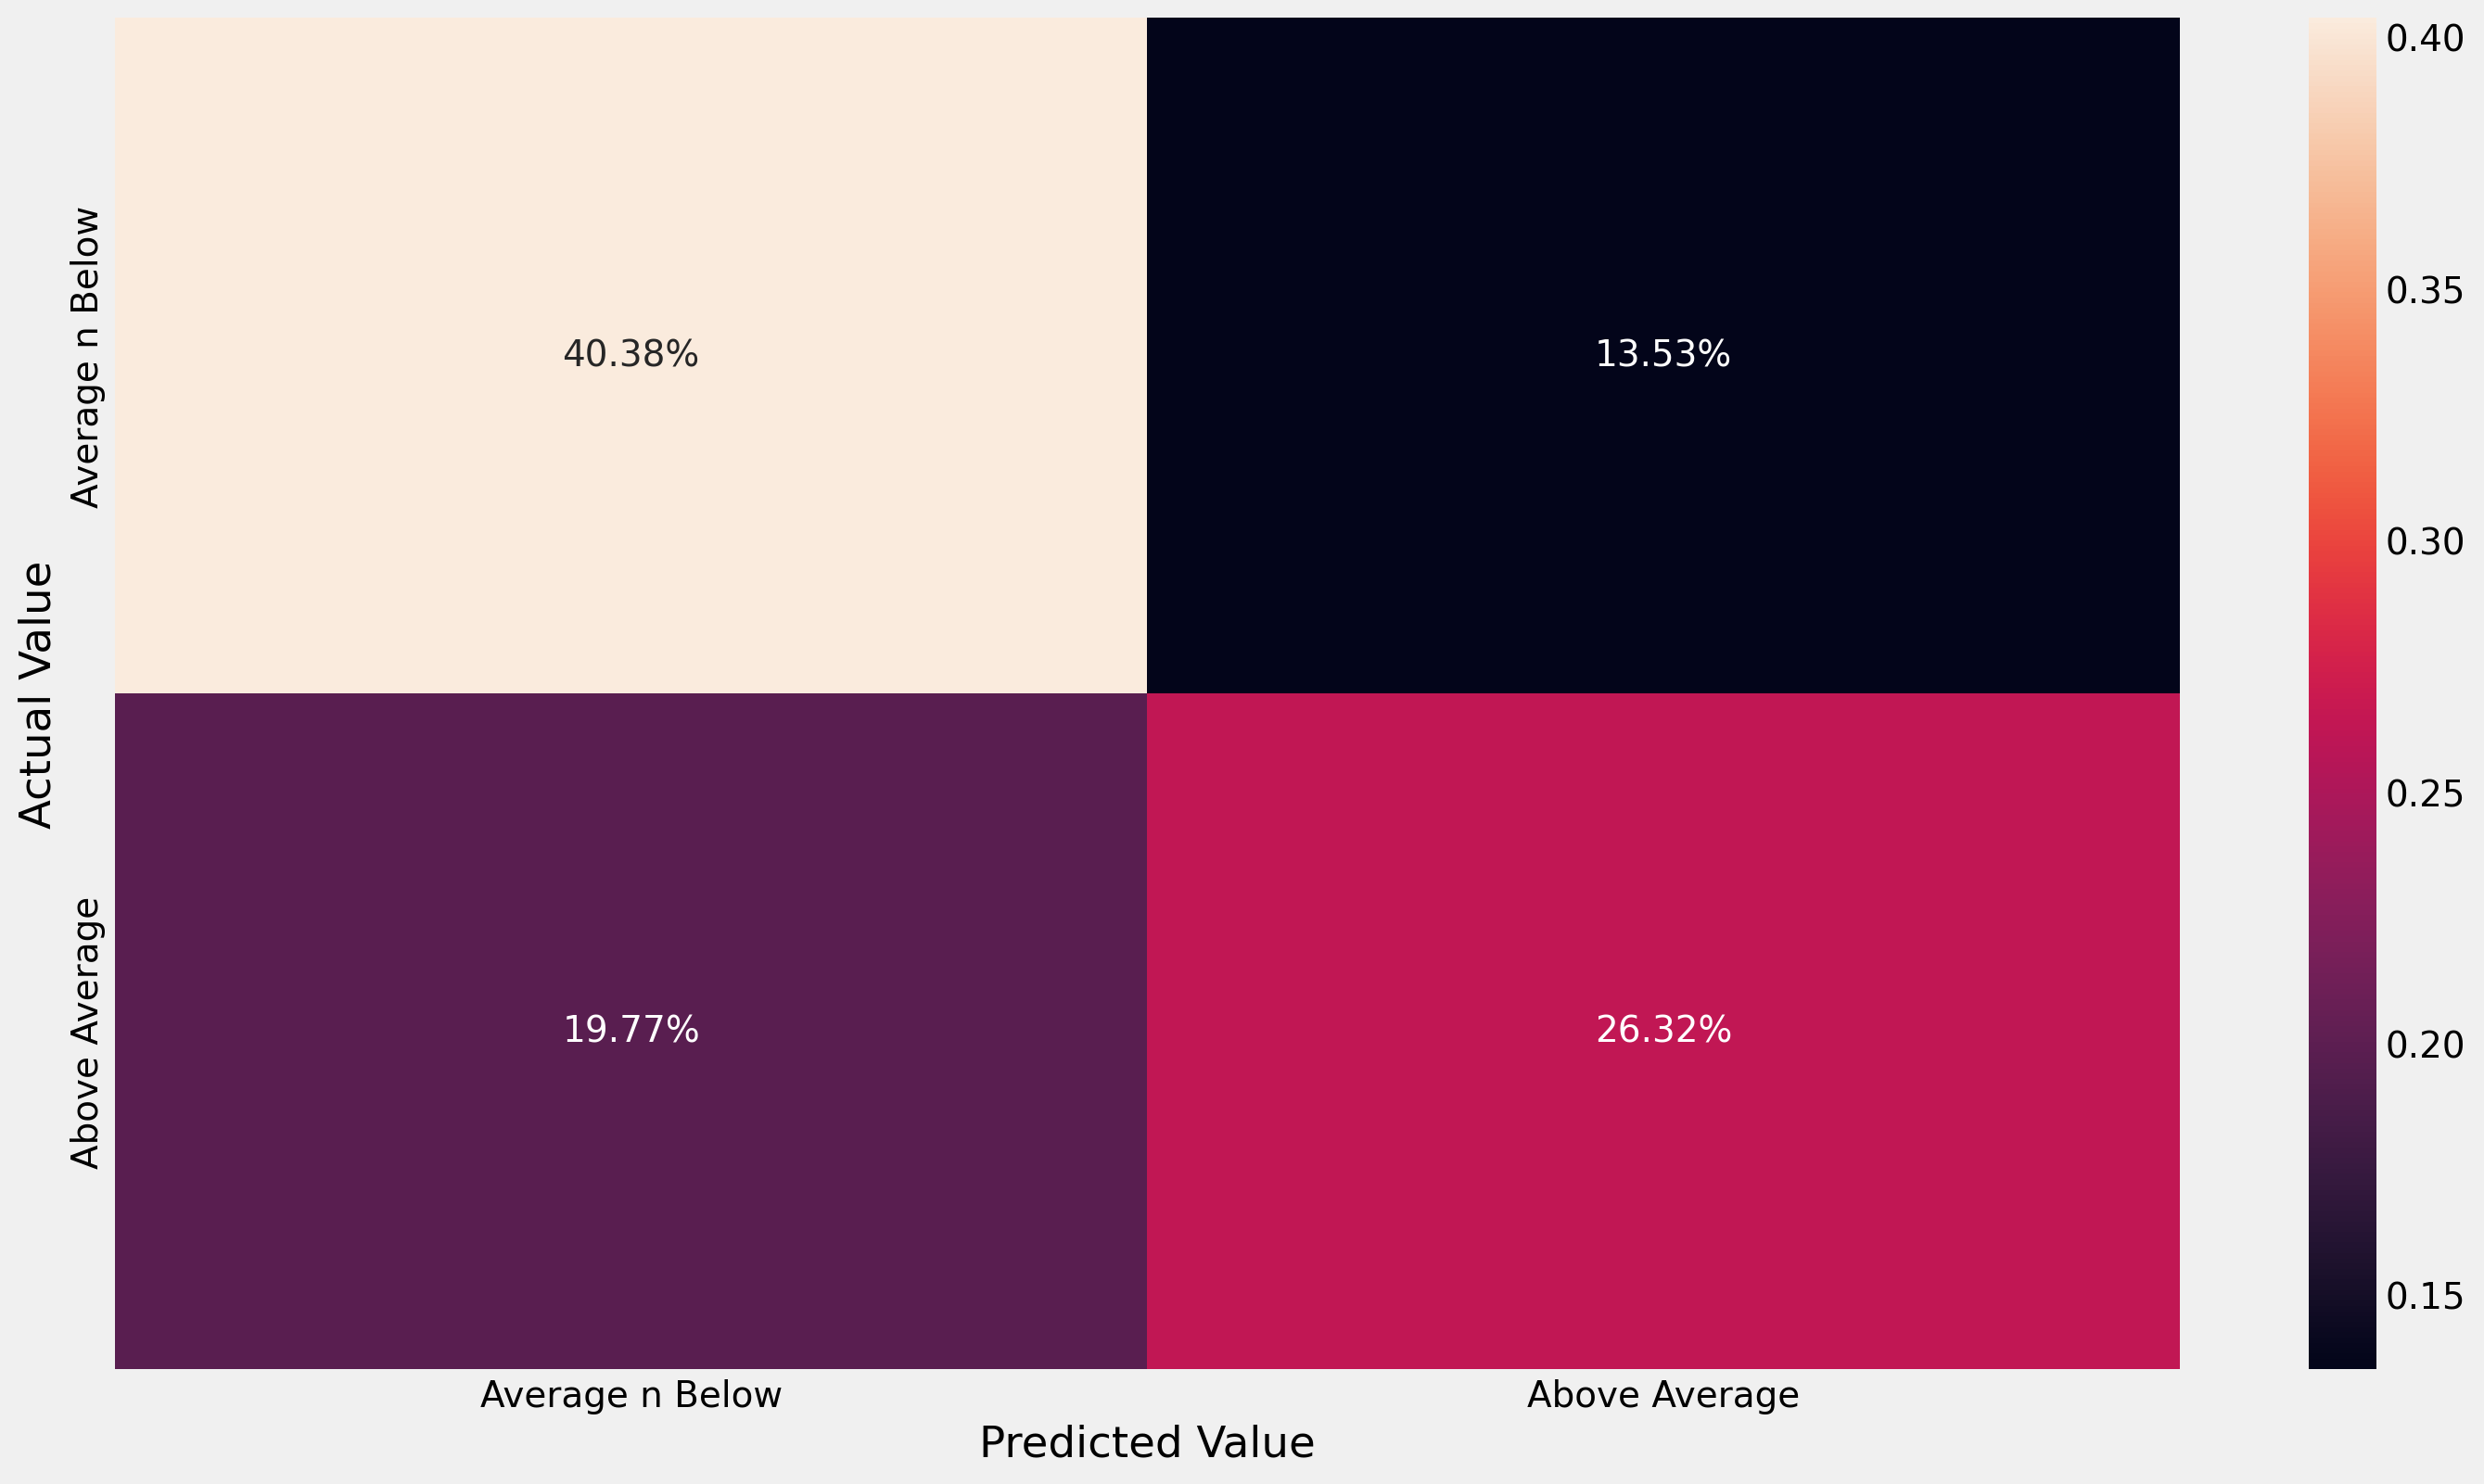

In [45]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['Average n Below', 'Above Average'],
            yticklabels=['Average n Below', 'Above Average'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## 4.1 Random Tree Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

> Q: Complete the following cell

In [47]:
model_randtree = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.8112534049392598
0.6516865002203728


Text(98.58333333333331, 0.5, 'Actual Value')

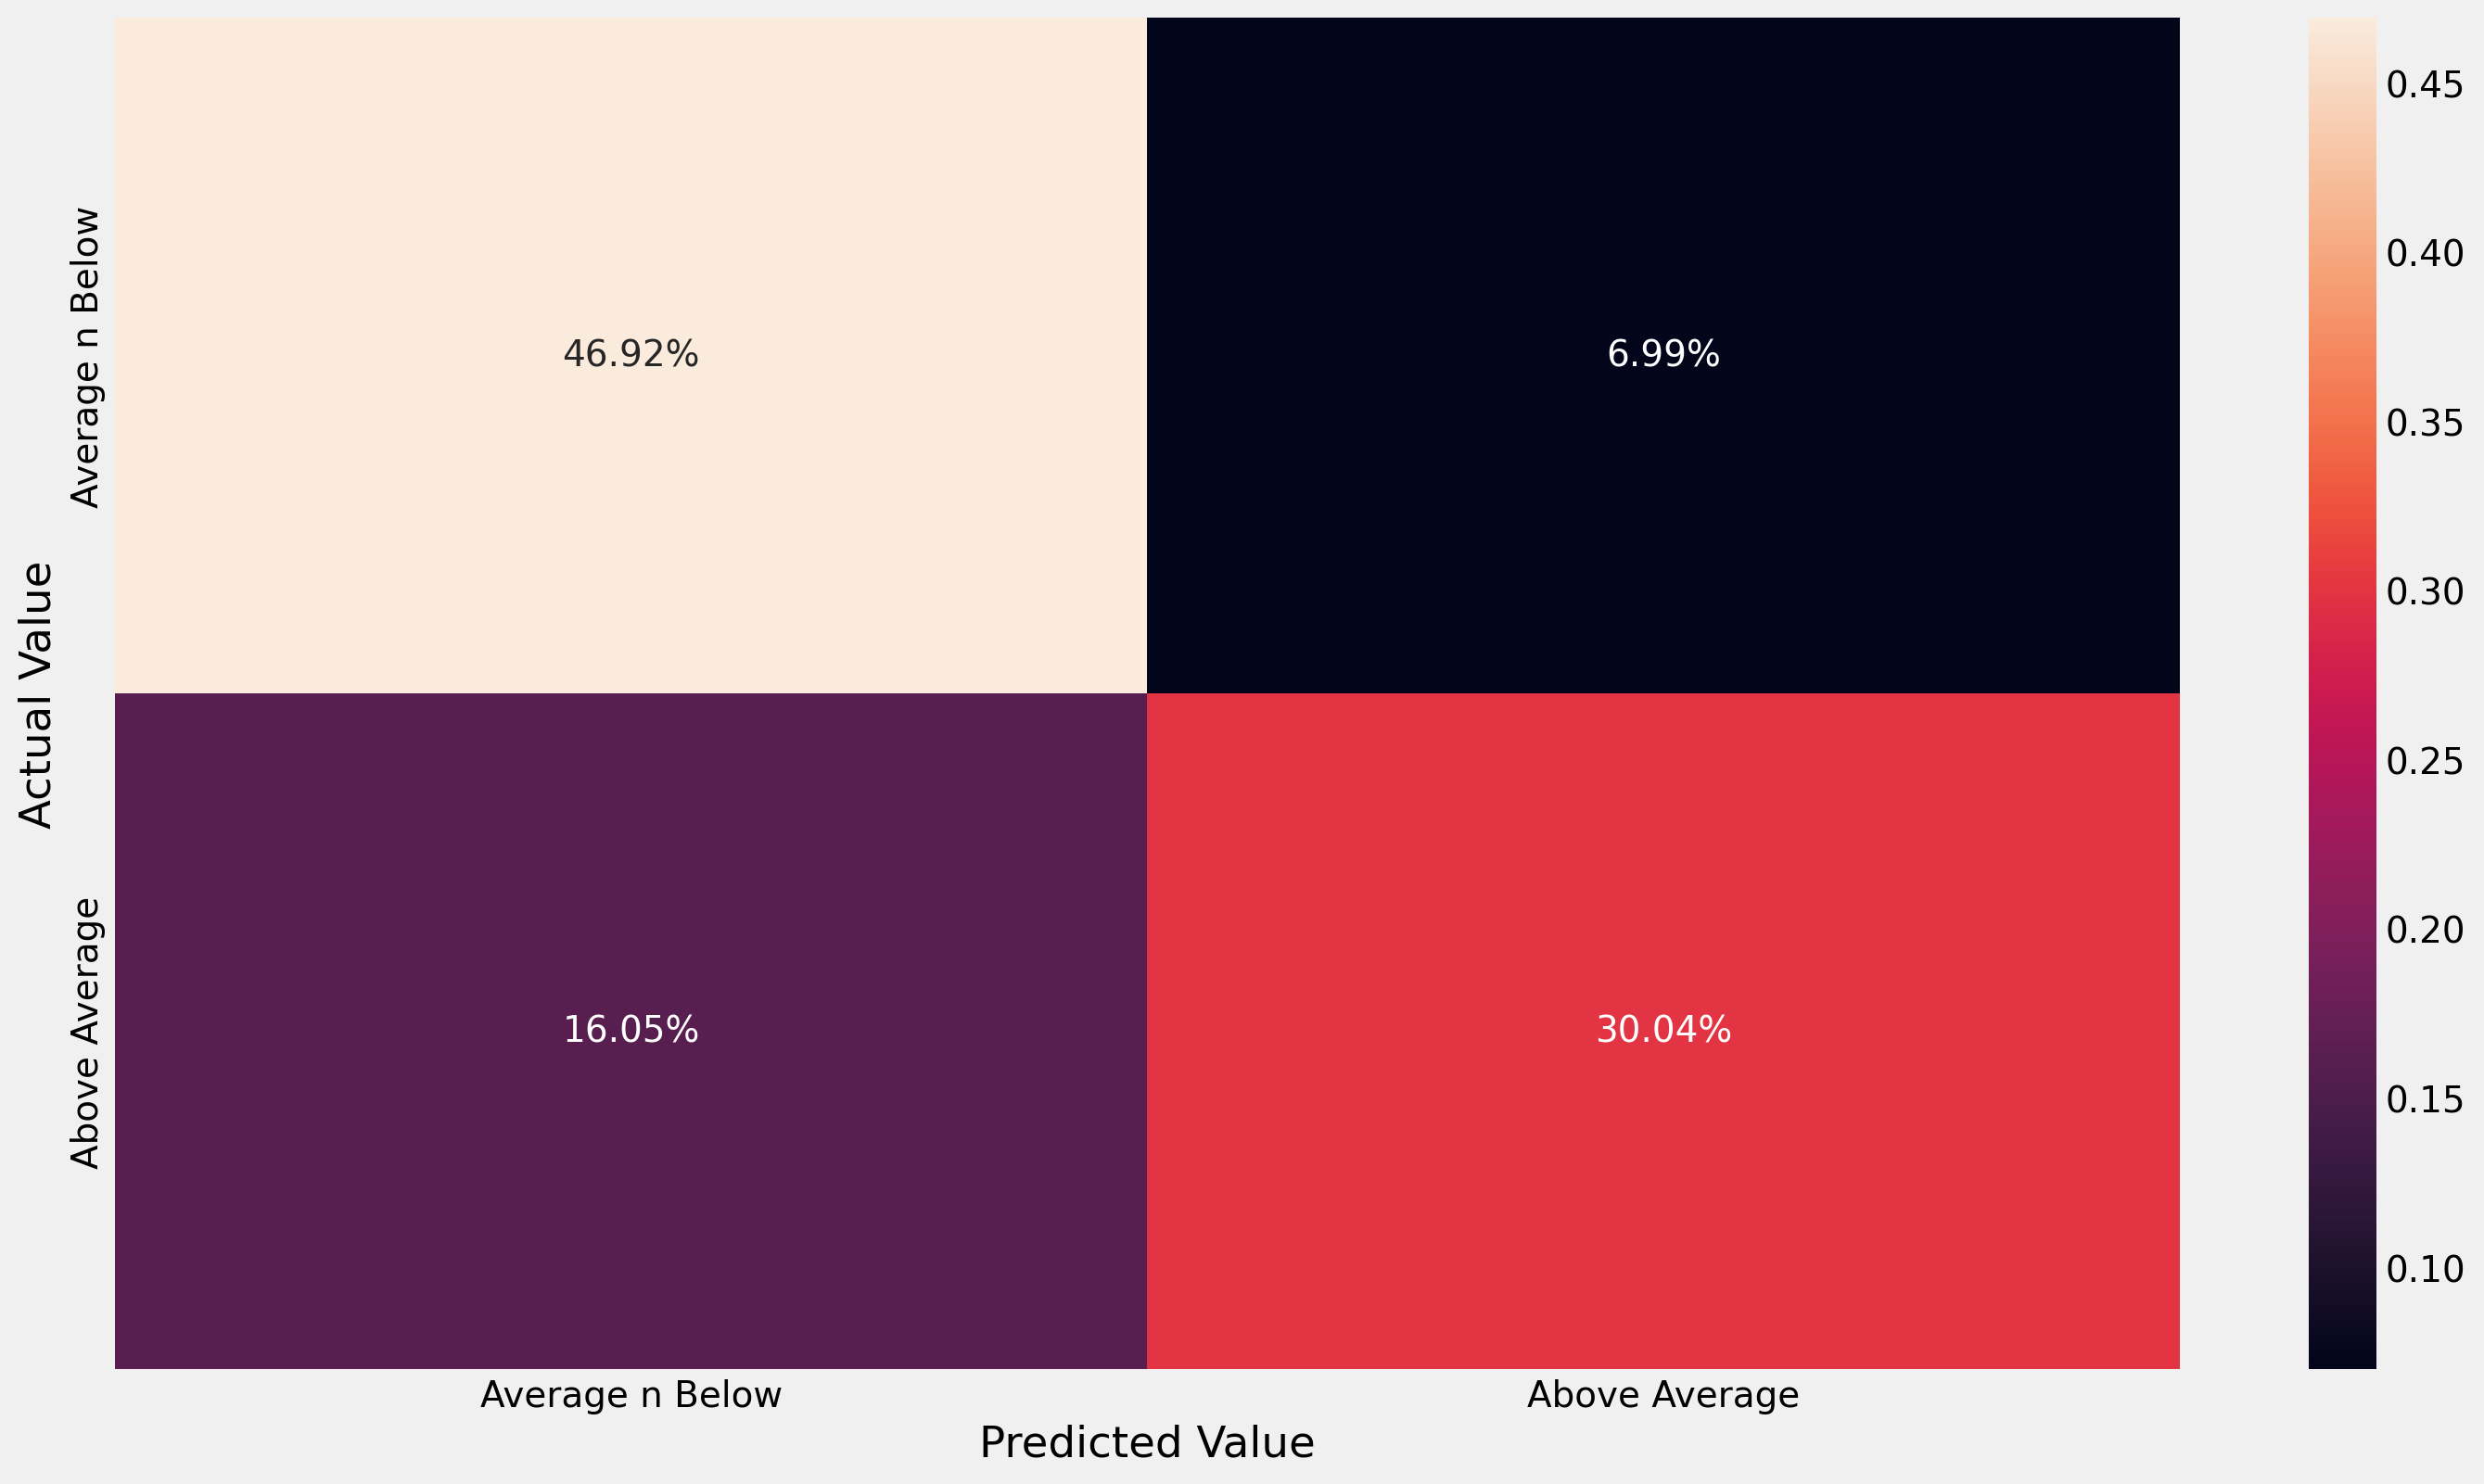

In [48]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['Average n Below', 'Above Average'],
            yticklabels=['Average n Below', 'Above Average'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## 4.3 Your Model of Choice

### 4.3.1 Model A


🔷**TASK**
> Create a new model to predict **price_above_average** (whether or not the unit is sold both average price), <br>
> using any algorithmn of your choice (e.g. KNN, SVC, Random Forest). <br>
> Your model must have at least **12 numerical features**. and the use the following categorical columns: <br>
> - town
> - commercial
> - residential <br>

> Improved accuracy is great, but optional. <br>
> You can re-use any cell before this point for this task.<br>
> Some codes are provided as below.

In [ ]:

features_category_additional = [
    <..>
]

In [49]:
features_category_additional = [
    'town',
    'commercial',
    'residential'
]

In [50]:
# Create Dummies Variables for All Categorical Variables

df_dummies = pd.get_dummies(df[features_category_additional], drop_first=True)

# Add the Dummies Variables to the main Data Frame
df = pd.concat([df, df_dummies], axis=1, sort=False)

In [51]:
# Define your numerical features
features_numeric = [
    'Tranc_Year',
    'flat_type_numerized',
    'floor_area_sqm',
    'storey_relative',
    'age_approx',
    'Mall_Nearest_Distance',
    'Mall_Within_1km',
    'Hawker_Nearest_Distance',
    'Hawker_Within_1km',
    'Hawker_Within_2km',
    'hawker_food_stalls',
    'hawker_market_stalls'
]

In [52]:
# Combining numerical and categorical features into one list
features = features_numeric + list(df_dummies.columns)

In [53]:
# Set the target for prediction
target = 'price_above_average'

In [54]:
# Splitting the data for training and testing
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=2020)

In [55]:
# Import your model from Sklearn package
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_randtree2 = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree2.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree2.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.8240003126567355
0.6568445210600647


Text(98.58333333333331, 0.5, 'Actual Value')

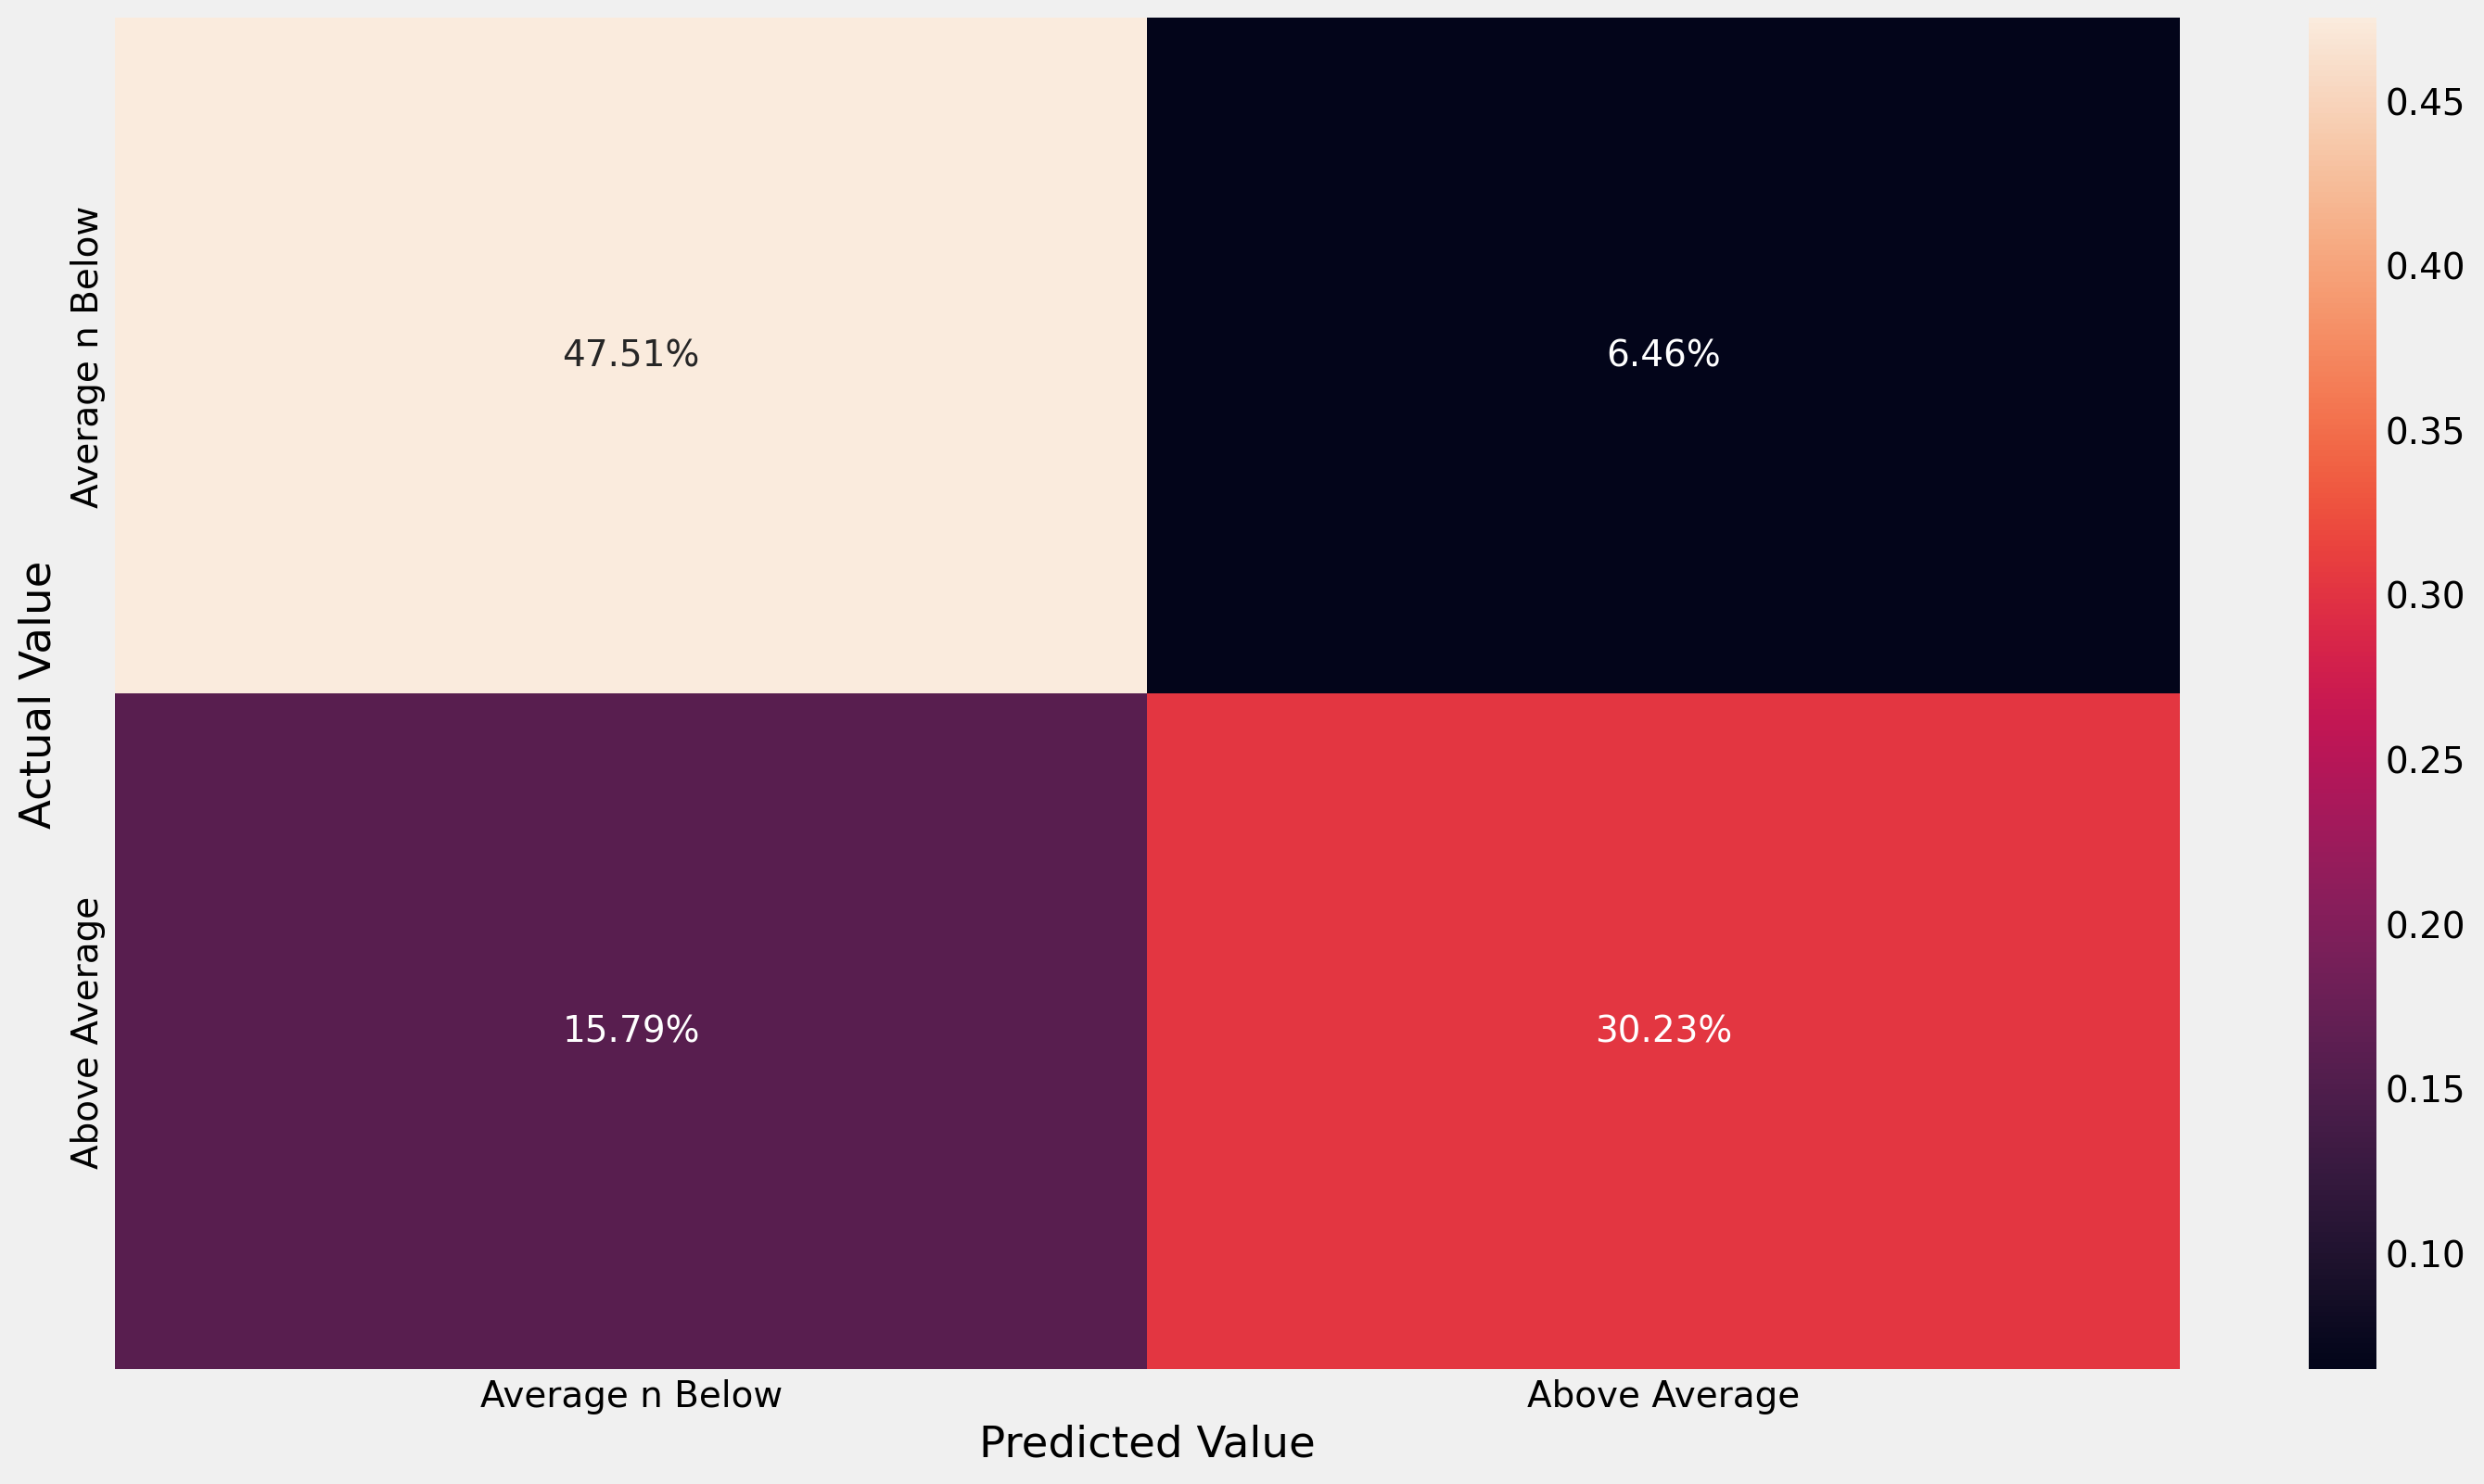

In [57]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['Average n Below', 'Above Average'],
            yticklabels=['Average n Below', 'Above Average'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

---

### 4.3.2. Model B


🔷**TASK**
> Create a model with the same set of features as above, to predict **price_above_80percentile**. <br>
> You may create more cells wherever you need to. <br>
> You may even read in the raw data if you think you want to start fresh and have messed up the **df**.

In [58]:
features = features_numeric + list(df_dummies.columns)

In [59]:
target = 'price_above_80percentile'

In [60]:
# Keep 25% of the data for testing
# Set random_state=2020
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=.25, random_state=2020)

In [61]:
# Import the model from Sklearn package
from sklearn.ensemble import RandomForestClassifier

In [62]:
model_randtree3 = RandomForestClassifier(max_depth=7, min_samples_leaf=30)

# Train the model
model_randtree3.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_randtree3.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

0.9823781795893349
0.07835013748854262


Text(98.58333333333331, 0.5, 'Actual Value')

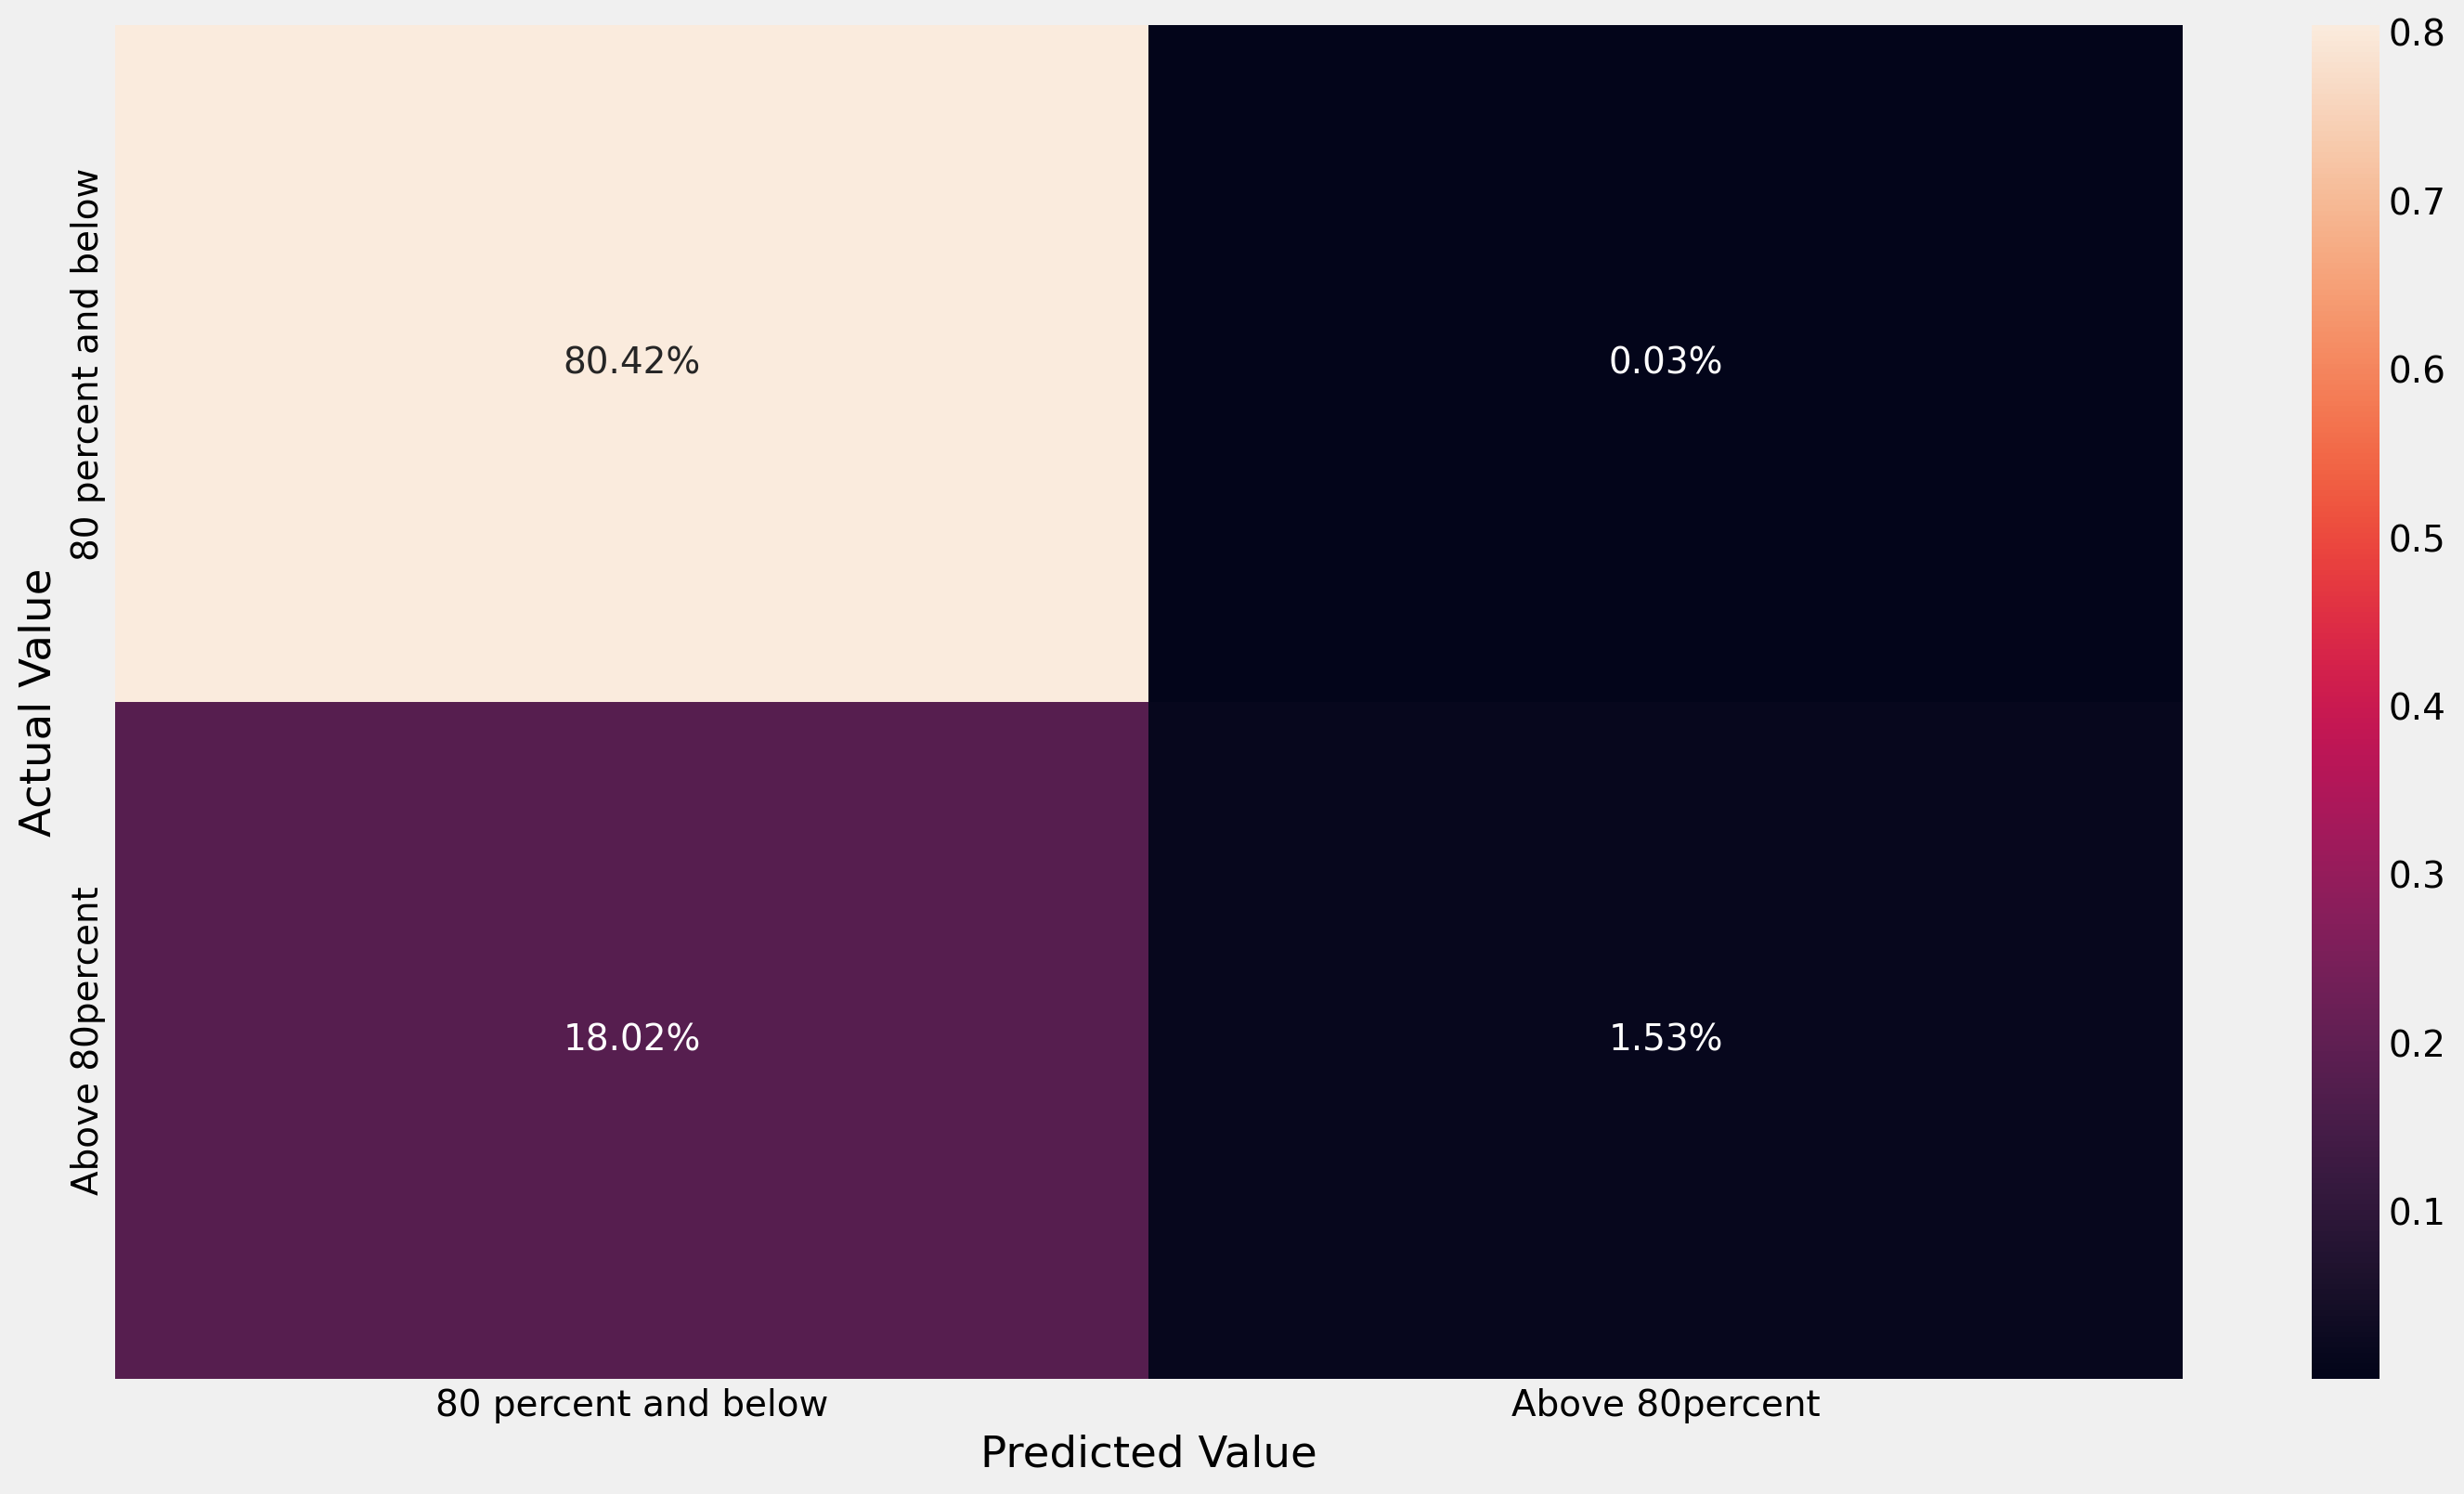

In [63]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['80 percent and below', 'Above 80percent'],
            yticklabels=['80 percent and below', 'Above 80percent'])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# Extra Learning: Adjusting Prediction with Decision Threshold

- All of the below (until the end of this document) are OPTIONAL CONTENTS
- They will not be tested in capstone assignment or quiz
- There is no task needed to be submitted. They are codes for you to run through, understand, and playing the parameters for experimenting with the outputs

In [64]:
model_logreg = LogisticRegression(max_iter=1000)

# Train the model
model_logreg.fit(x_train, y_train)

# Generate predictions based on the test data set
predictions = model_logreg.predict(x_test)


# Generate Precision of the model
print(metrics.precision_score(y_test, predictions))

# Generate Recall of the model
print(metrics.recall_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6829336307863916
0.20950809654750993


In [65]:
probability_of_above_average = model_logreg.predict_proba(x_test)
df_proba = pd.DataFrame(probability_of_above_average, columns=['Negative', 'Positive'])

In [66]:
# Add a column containing the 'binary' (1/0) predictions that we generated earlier on
df_proba['Prediction'] = predictions

In [67]:
# Observe the predictions
# Note that only those of which its "Positive" is above 0.5 are predicted as True (above the average)
df_proba

,Negative,Positive,Prediction
0,0.907289,0.092711,False
1,0.975598,0.024402,False
2,0.850510,0.149490,False
3,0.776388,0.223612,False
4,0.921778,0.078222,False
...,...,...,...
418423,0.841426,0.158574,False
418424,0.690329,0.309671,False
418425,0.879609,0.120391,False
418426,0.922777,0.077223,False


Text(98.58333333333331, 0.5, 'Actual Value')

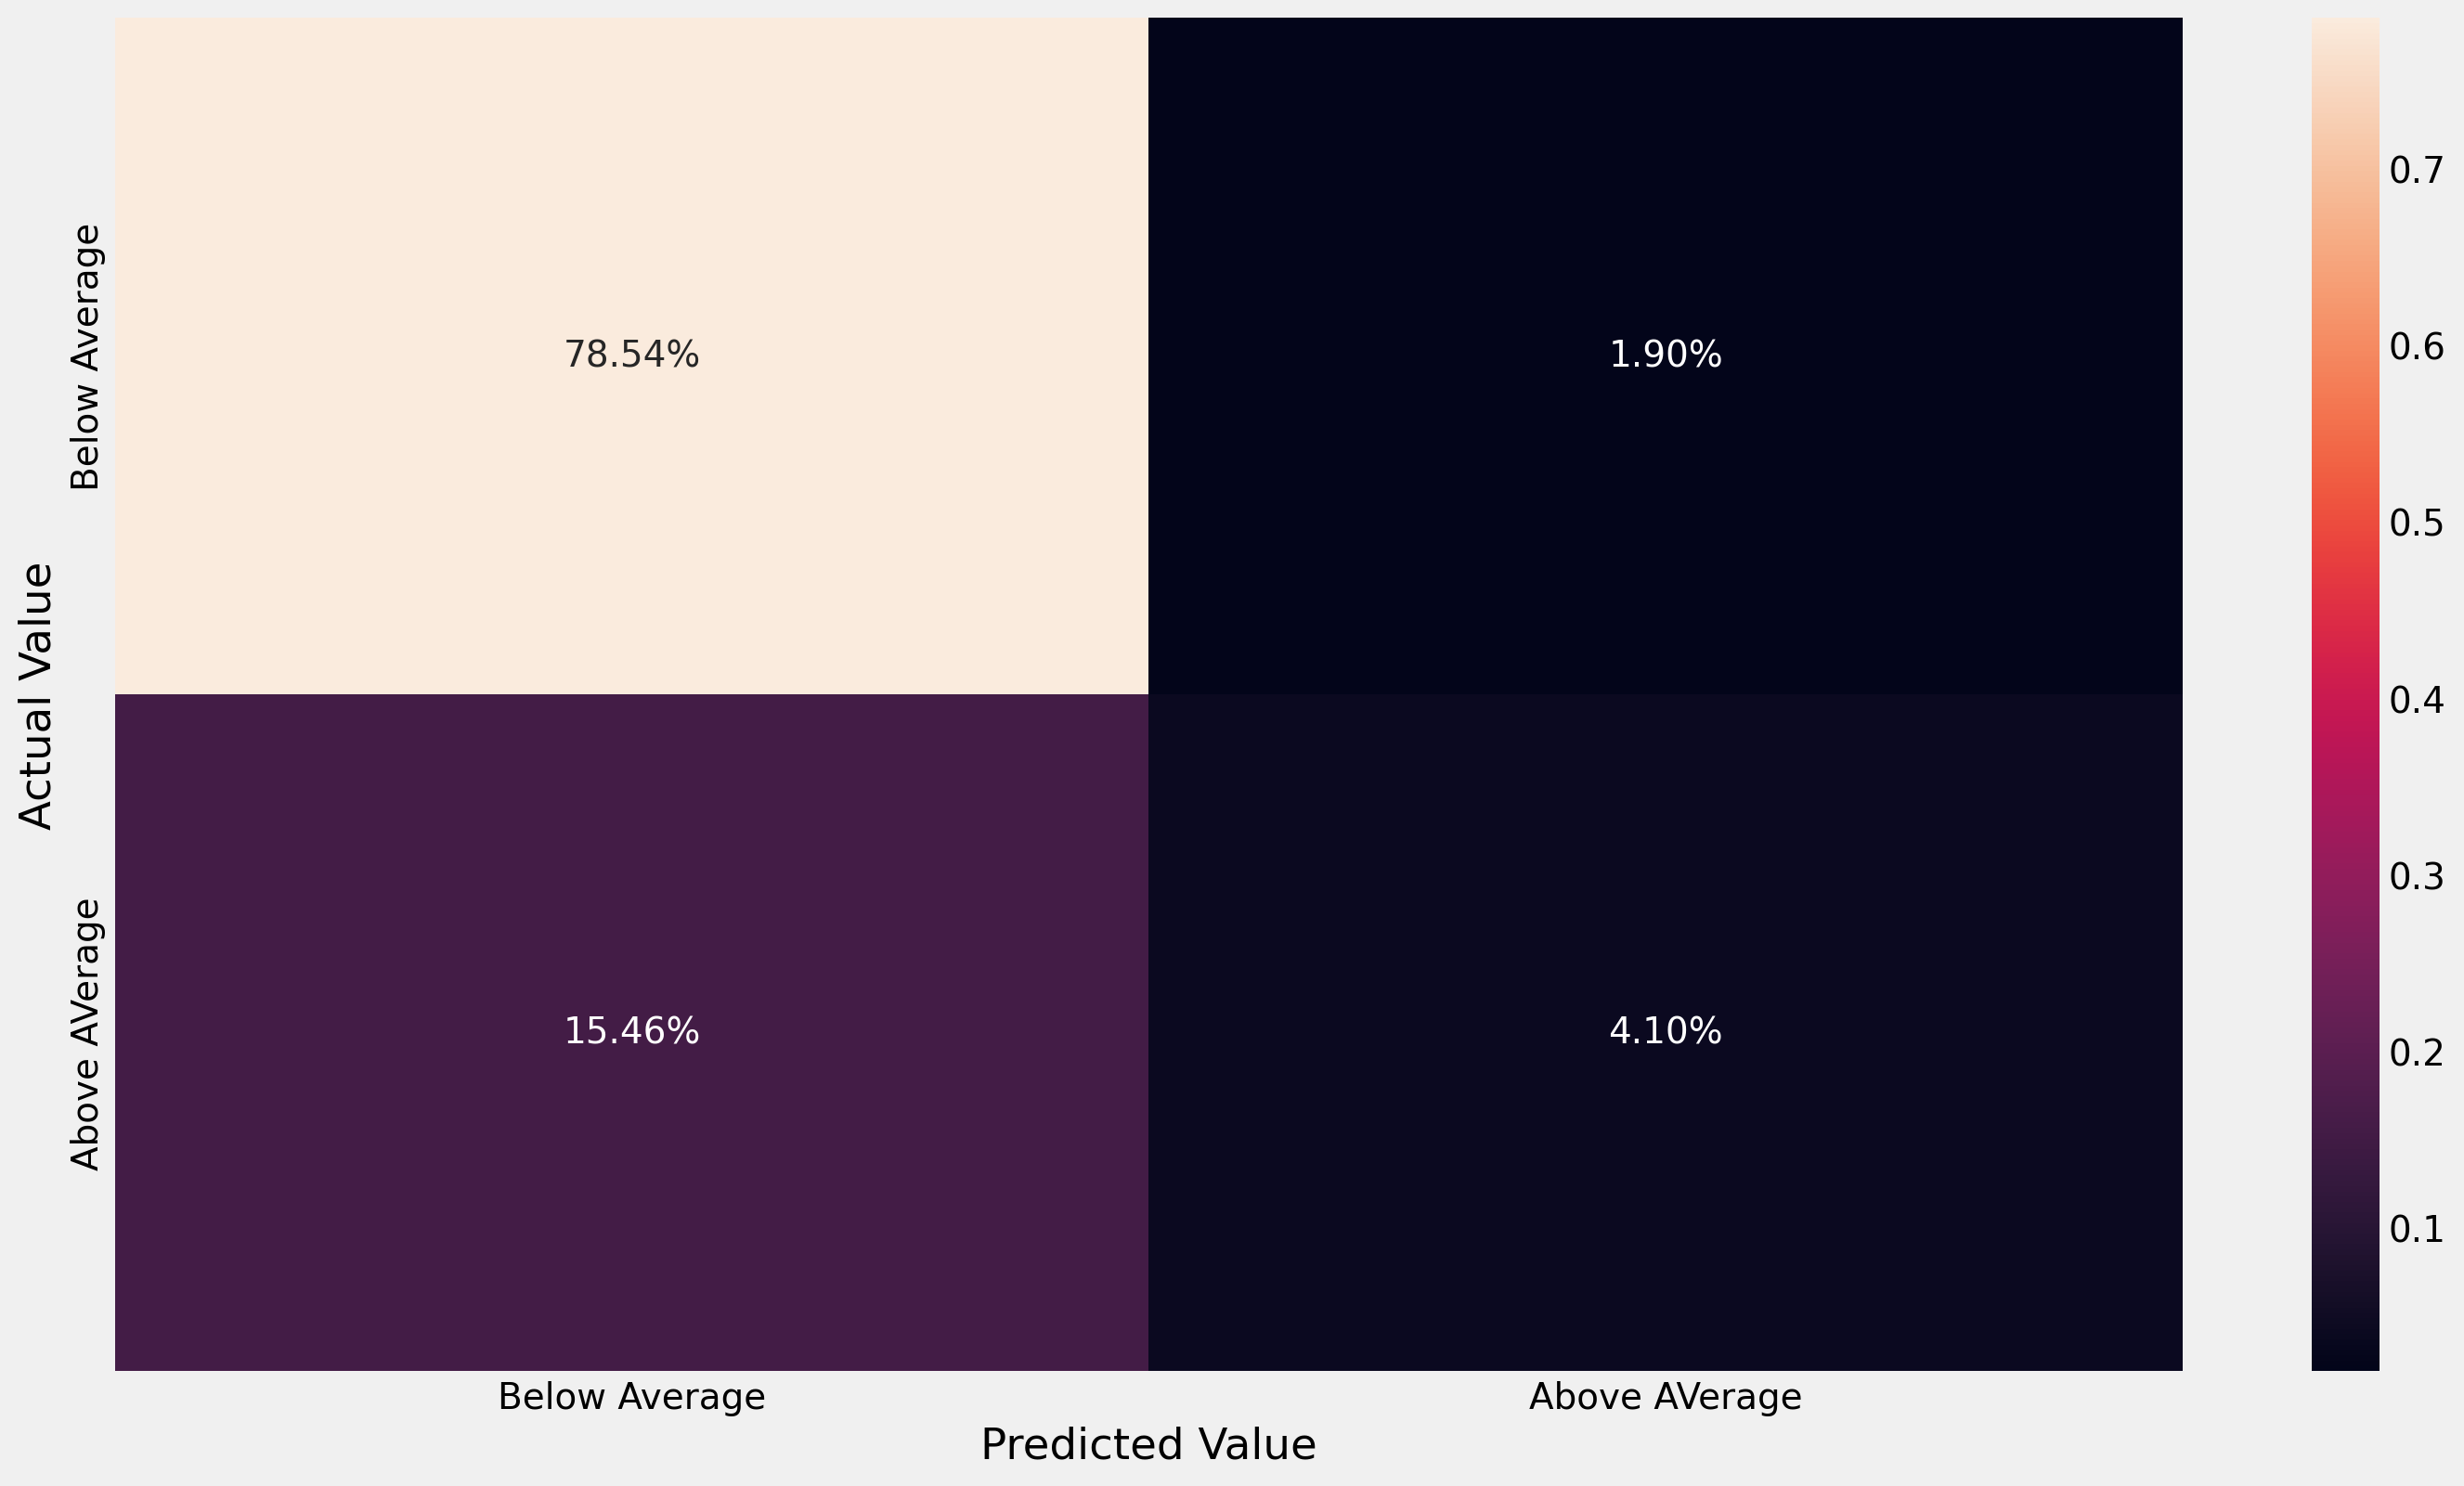

In [68]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['Below Average', 'Above AVerage'],
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

<ipython-input-69-c0c026c39cfa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_proba['Positive'])


<Axes: xlabel='Positive', ylabel='Density'>

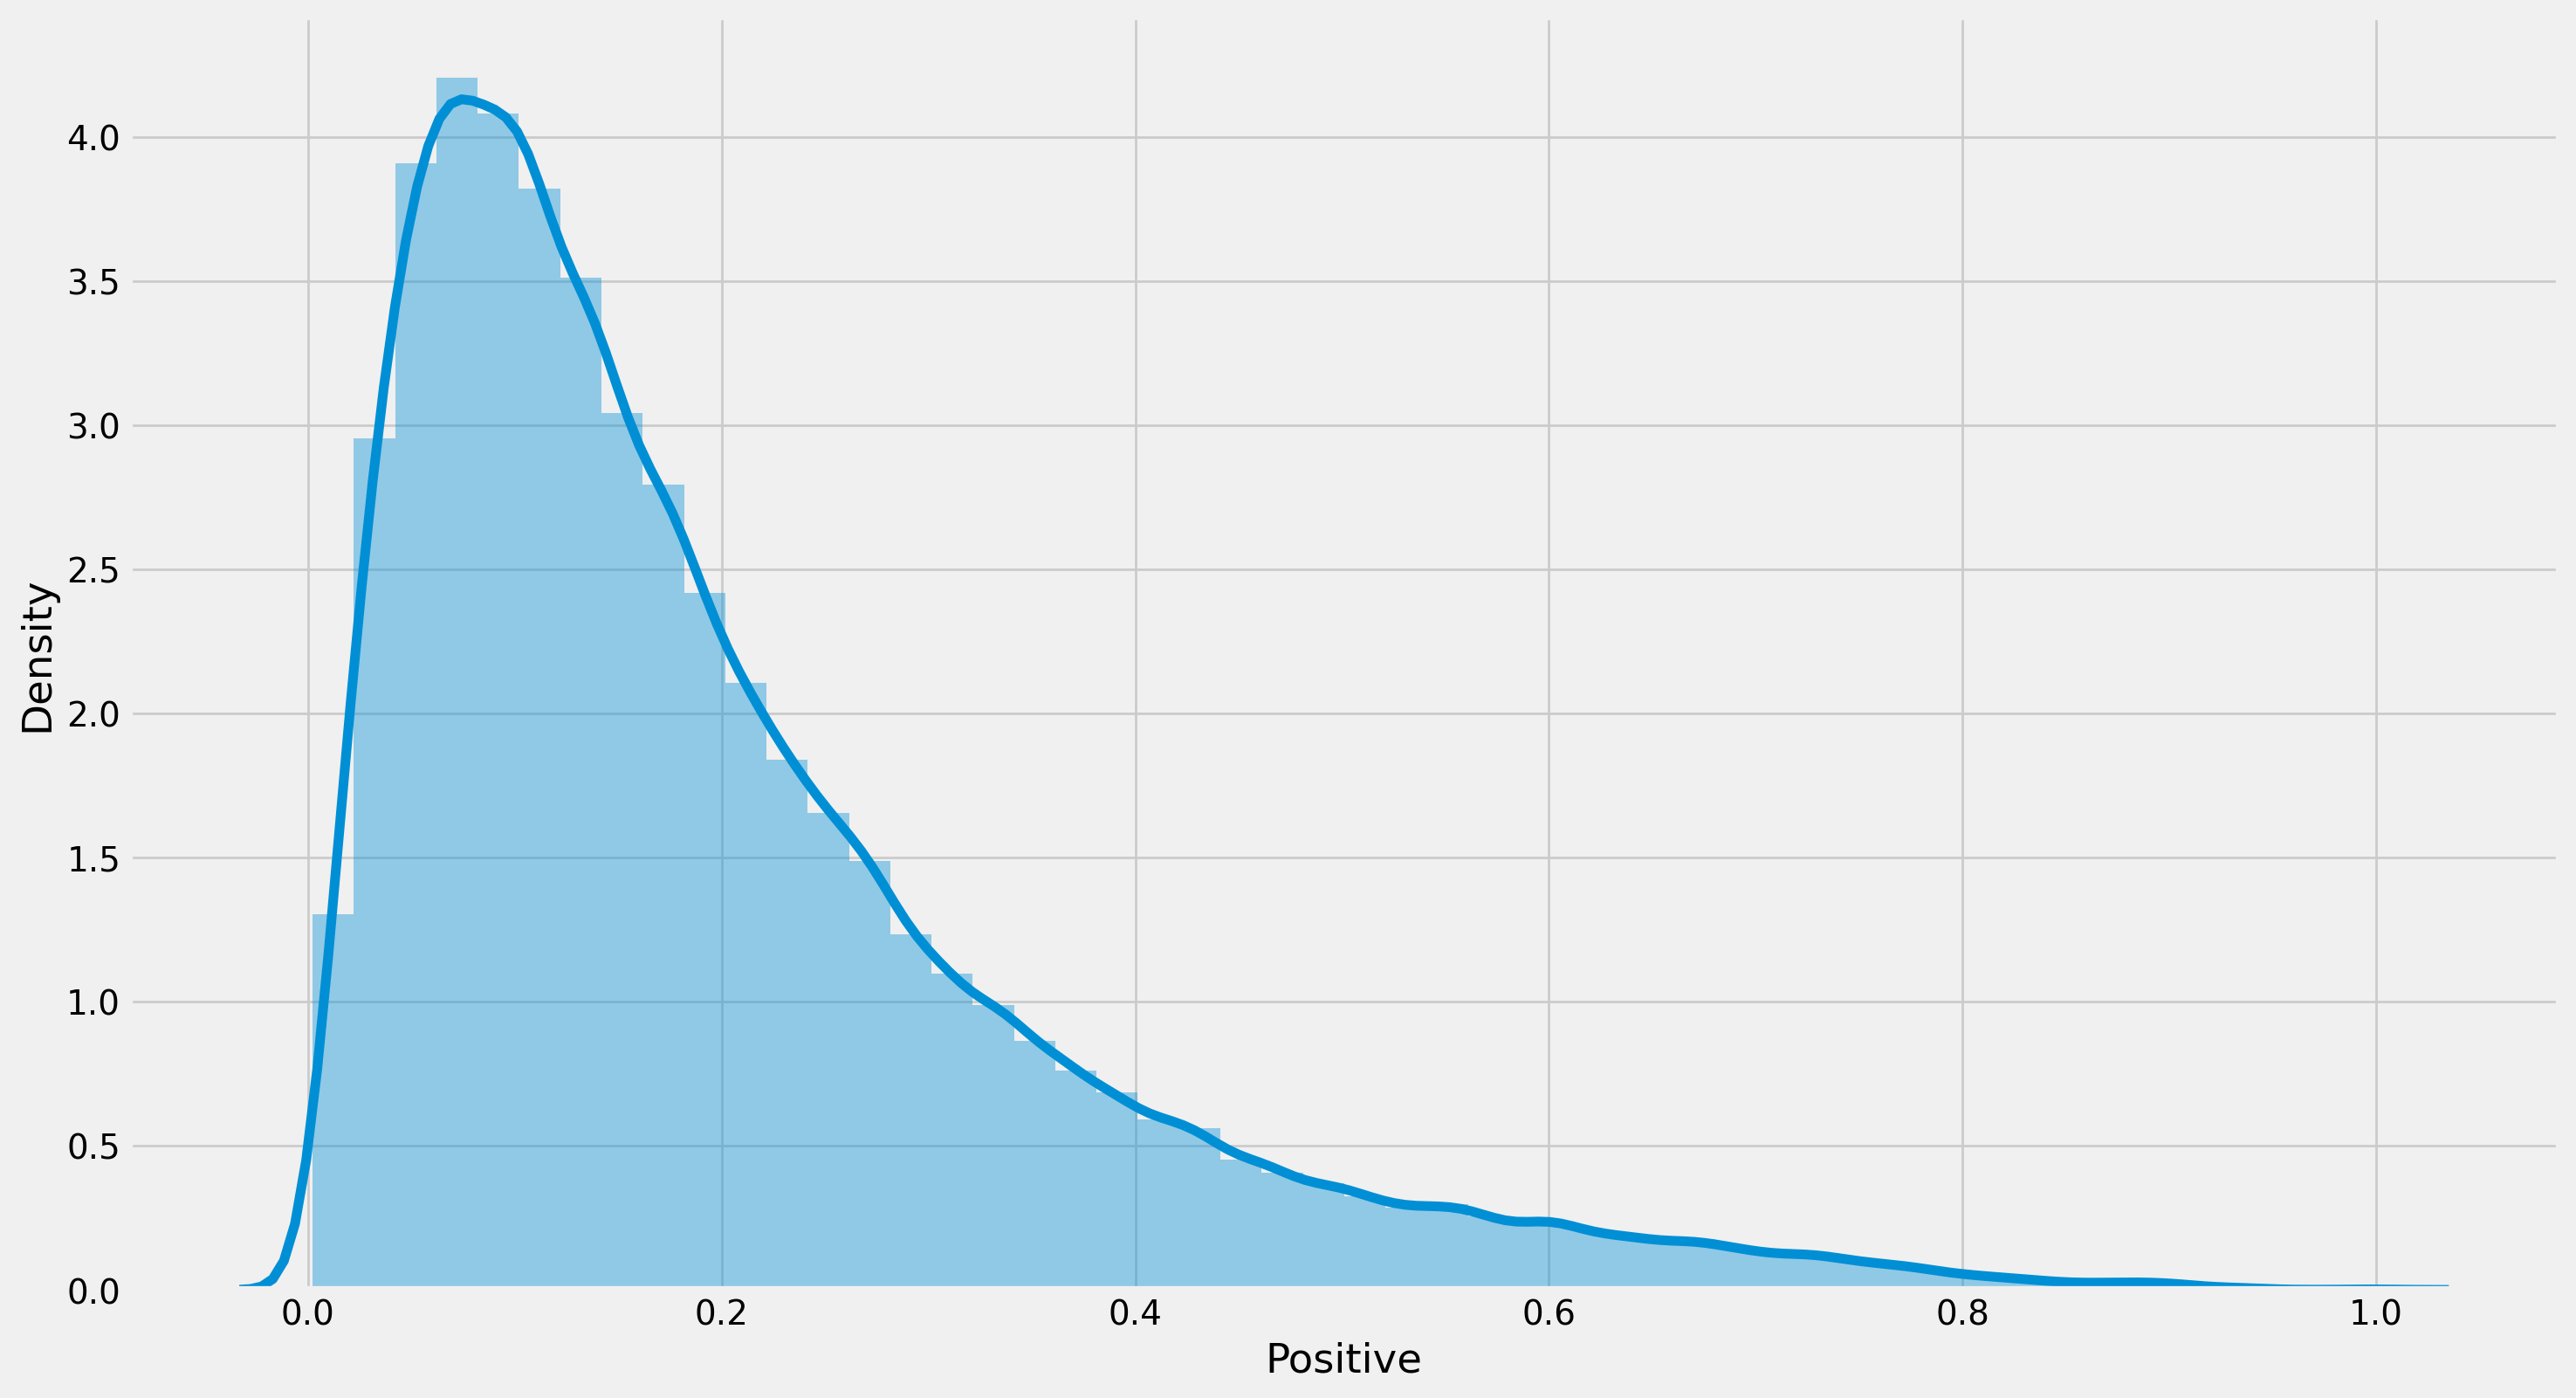

In [69]:
# Visualize the distribution of the probability of being positive (above average)
sns.distplot(df_proba['Positive'])

#### Setting the Decision Threshold and Re-generate the Predictions (binary)

In [70]:
# With this, even if the data row has 11% or above being positive, it will be classified as positive
decision_threshold = 0.10
predictions_adjusted = df_proba['Positive'] > decision_threshold

Text(98.58333333333331, 0.5, 'Actual Value')

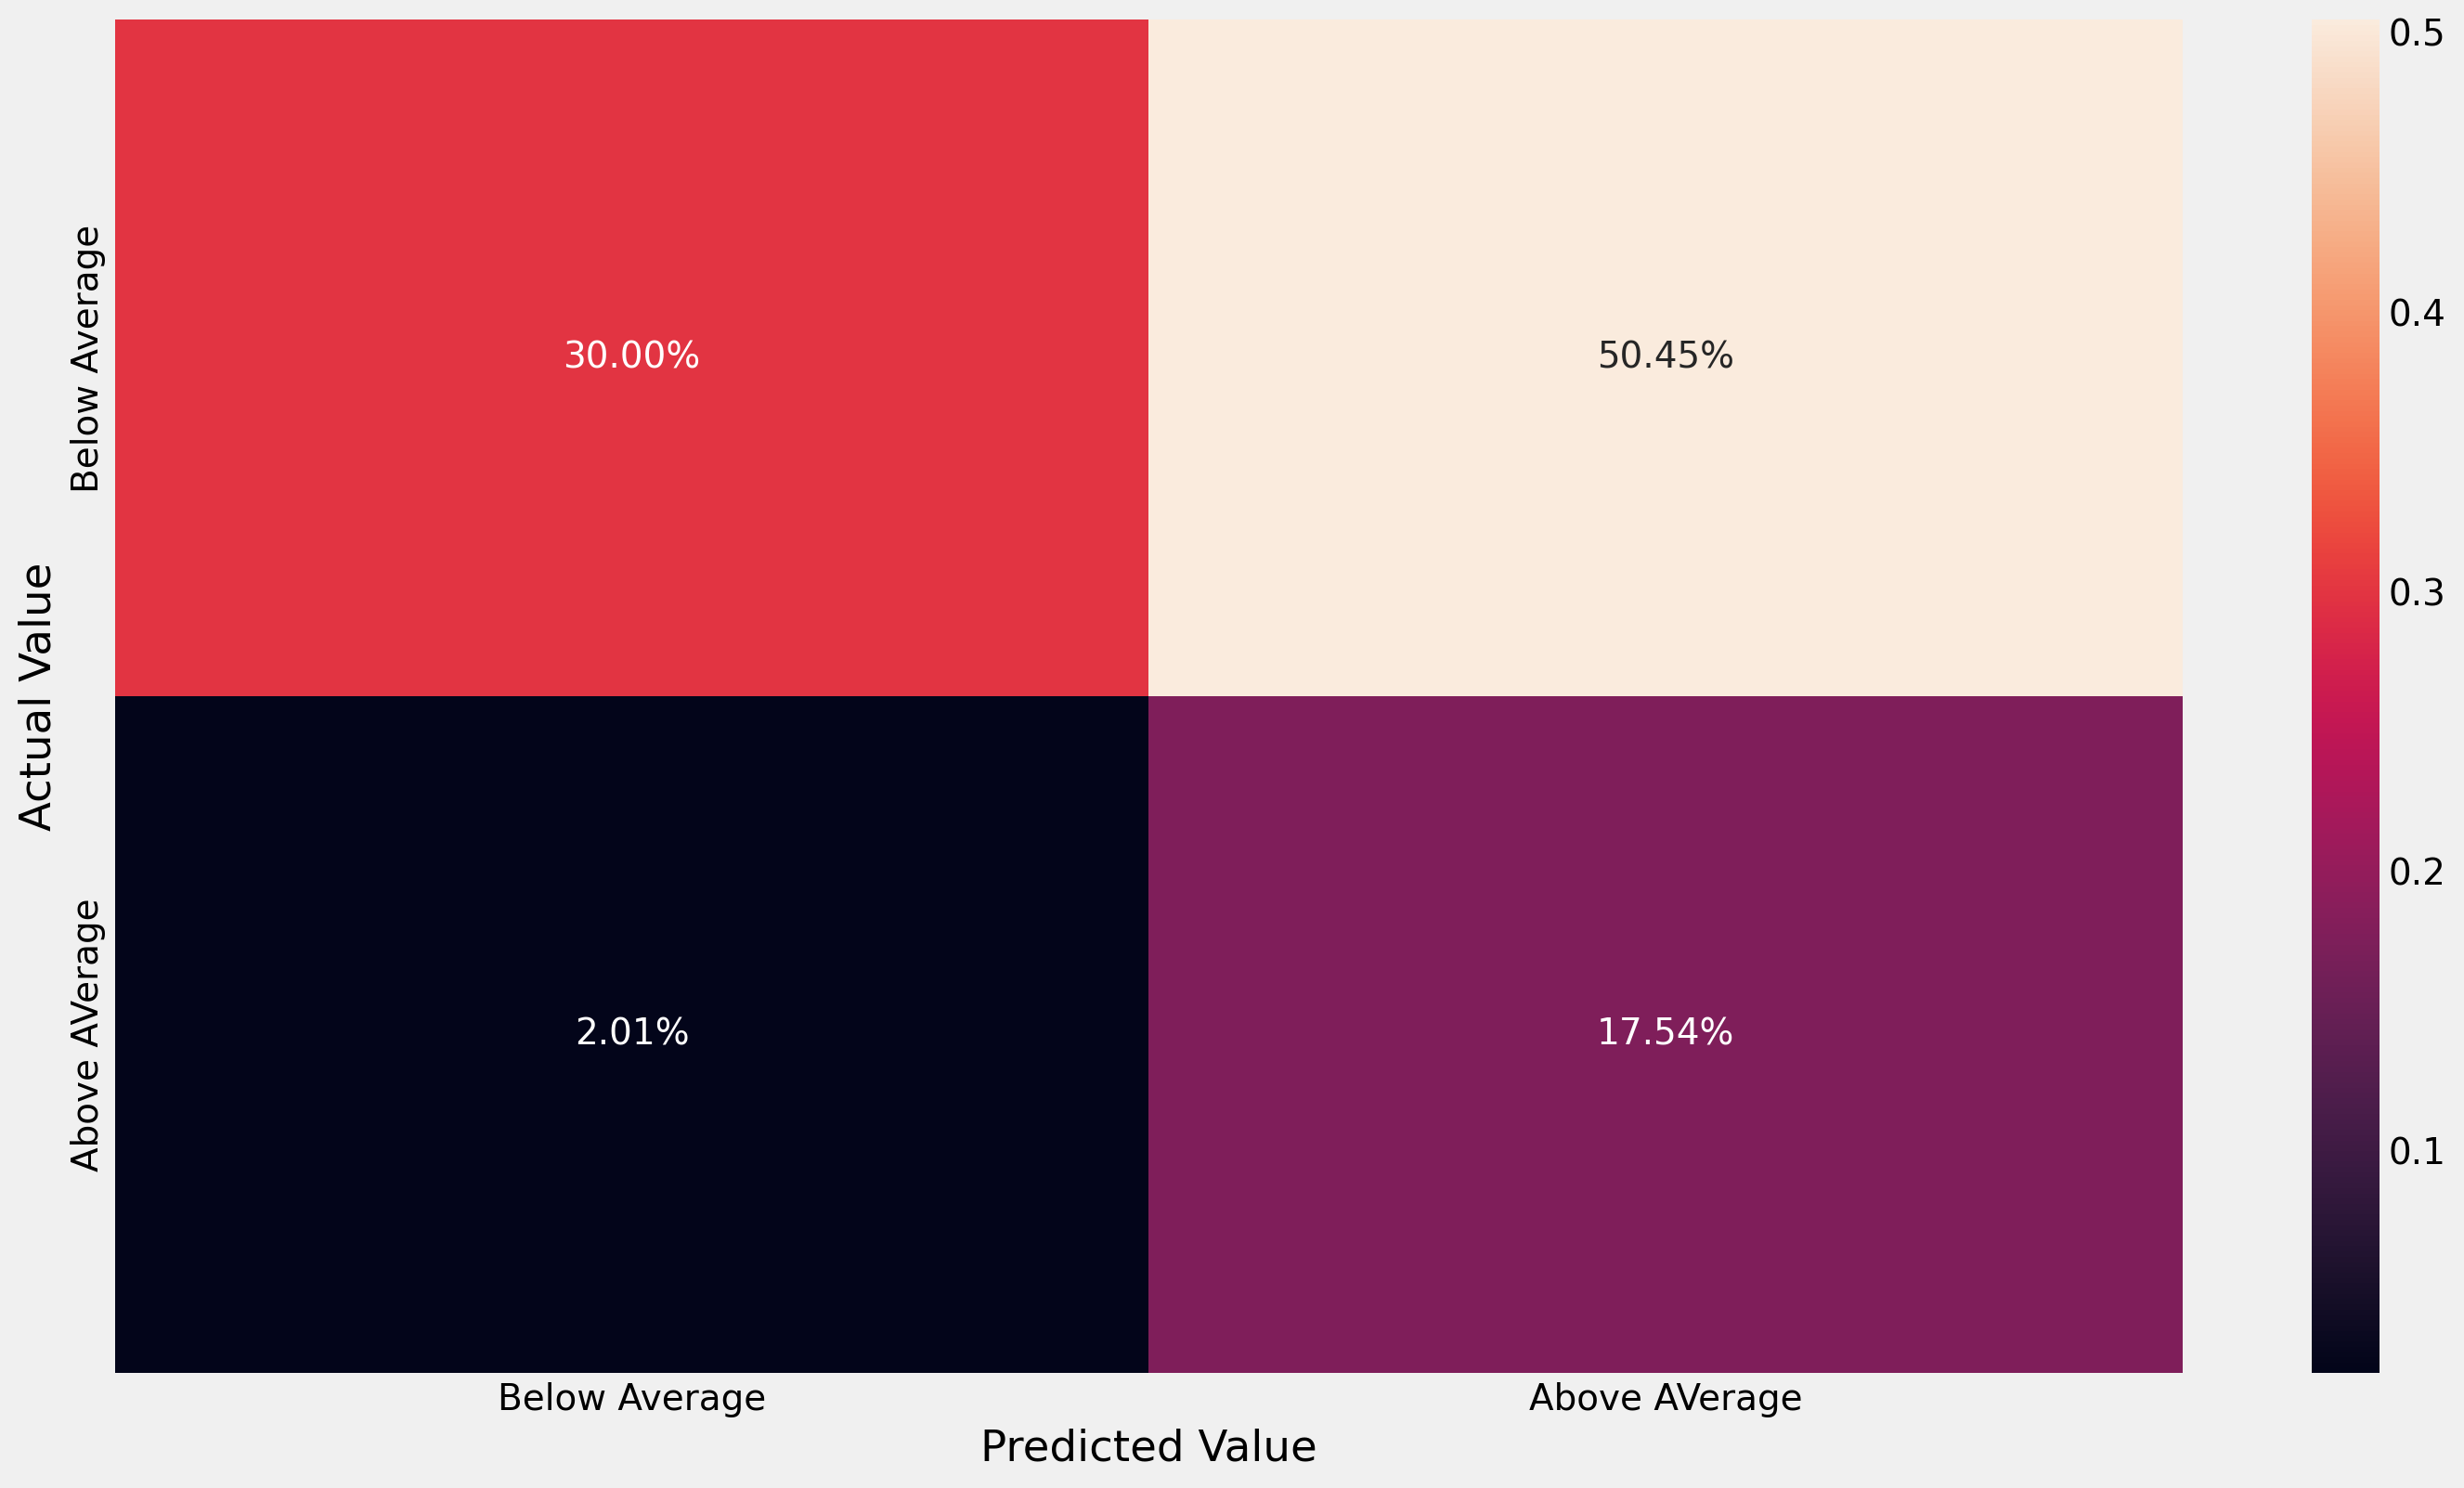

In [71]:
# Visualization the Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, predictions_adjusted)/ len(y_test),
            annot=True, fmt='.2%',
            xticklabels=['Below Average', 'Above AVerage'],
            yticklabels=['Below Average', 'Above AVerage'])

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

> The following function named 'precision_and_recal', \
> take in  1 input parameter, which is a list of decision threshold [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\
> and to print the precision and recall value for each of the decision thresholds

In [72]:
def precision_and_recal(thresholds):
    for t in thresholds:
        predictions_adjusted = df_proba['Positive'] > t
        precision = metrics.precision_score(y_test, predictions_adjusted)
        recall = metrics.recall_score(y_test, predictions_adjusted)
        print('At Threshold {:.4f}, Precision = {:.4f} | Recall = {:.4f}'.format(t, precision, recall))

precision_and_recal([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

At Threshold 0.1000, Precision = 0.2580 | Recall = 0.8971
At Threshold 0.2000, Precision = 0.3547 | Recall = 0.6618
At Threshold 0.3000, Precision = 0.4537 | Recall = 0.4556
At Threshold 0.4000, Precision = 0.5594 | Recall = 0.3082
At Threshold 0.5000, Precision = 0.6829 | Recall = 0.2095
At Threshold 0.6000, Precision = 0.7853 | Recall = 0.1277
At Threshold 0.7000, Precision = 0.8501 | Recall = 0.0595
At Threshold 0.8000, Precision = 0.8551 | Recall = 0.0168
At Threshold 0.9000, Precision = 0.8627 | Recall = 0.0027


#### Visualize the Effect of the Precision-Recall Trade Off

In [73]:
precision, recall, threshold = metrics.precision_recall_curve(y_test, df_proba['Positive'])

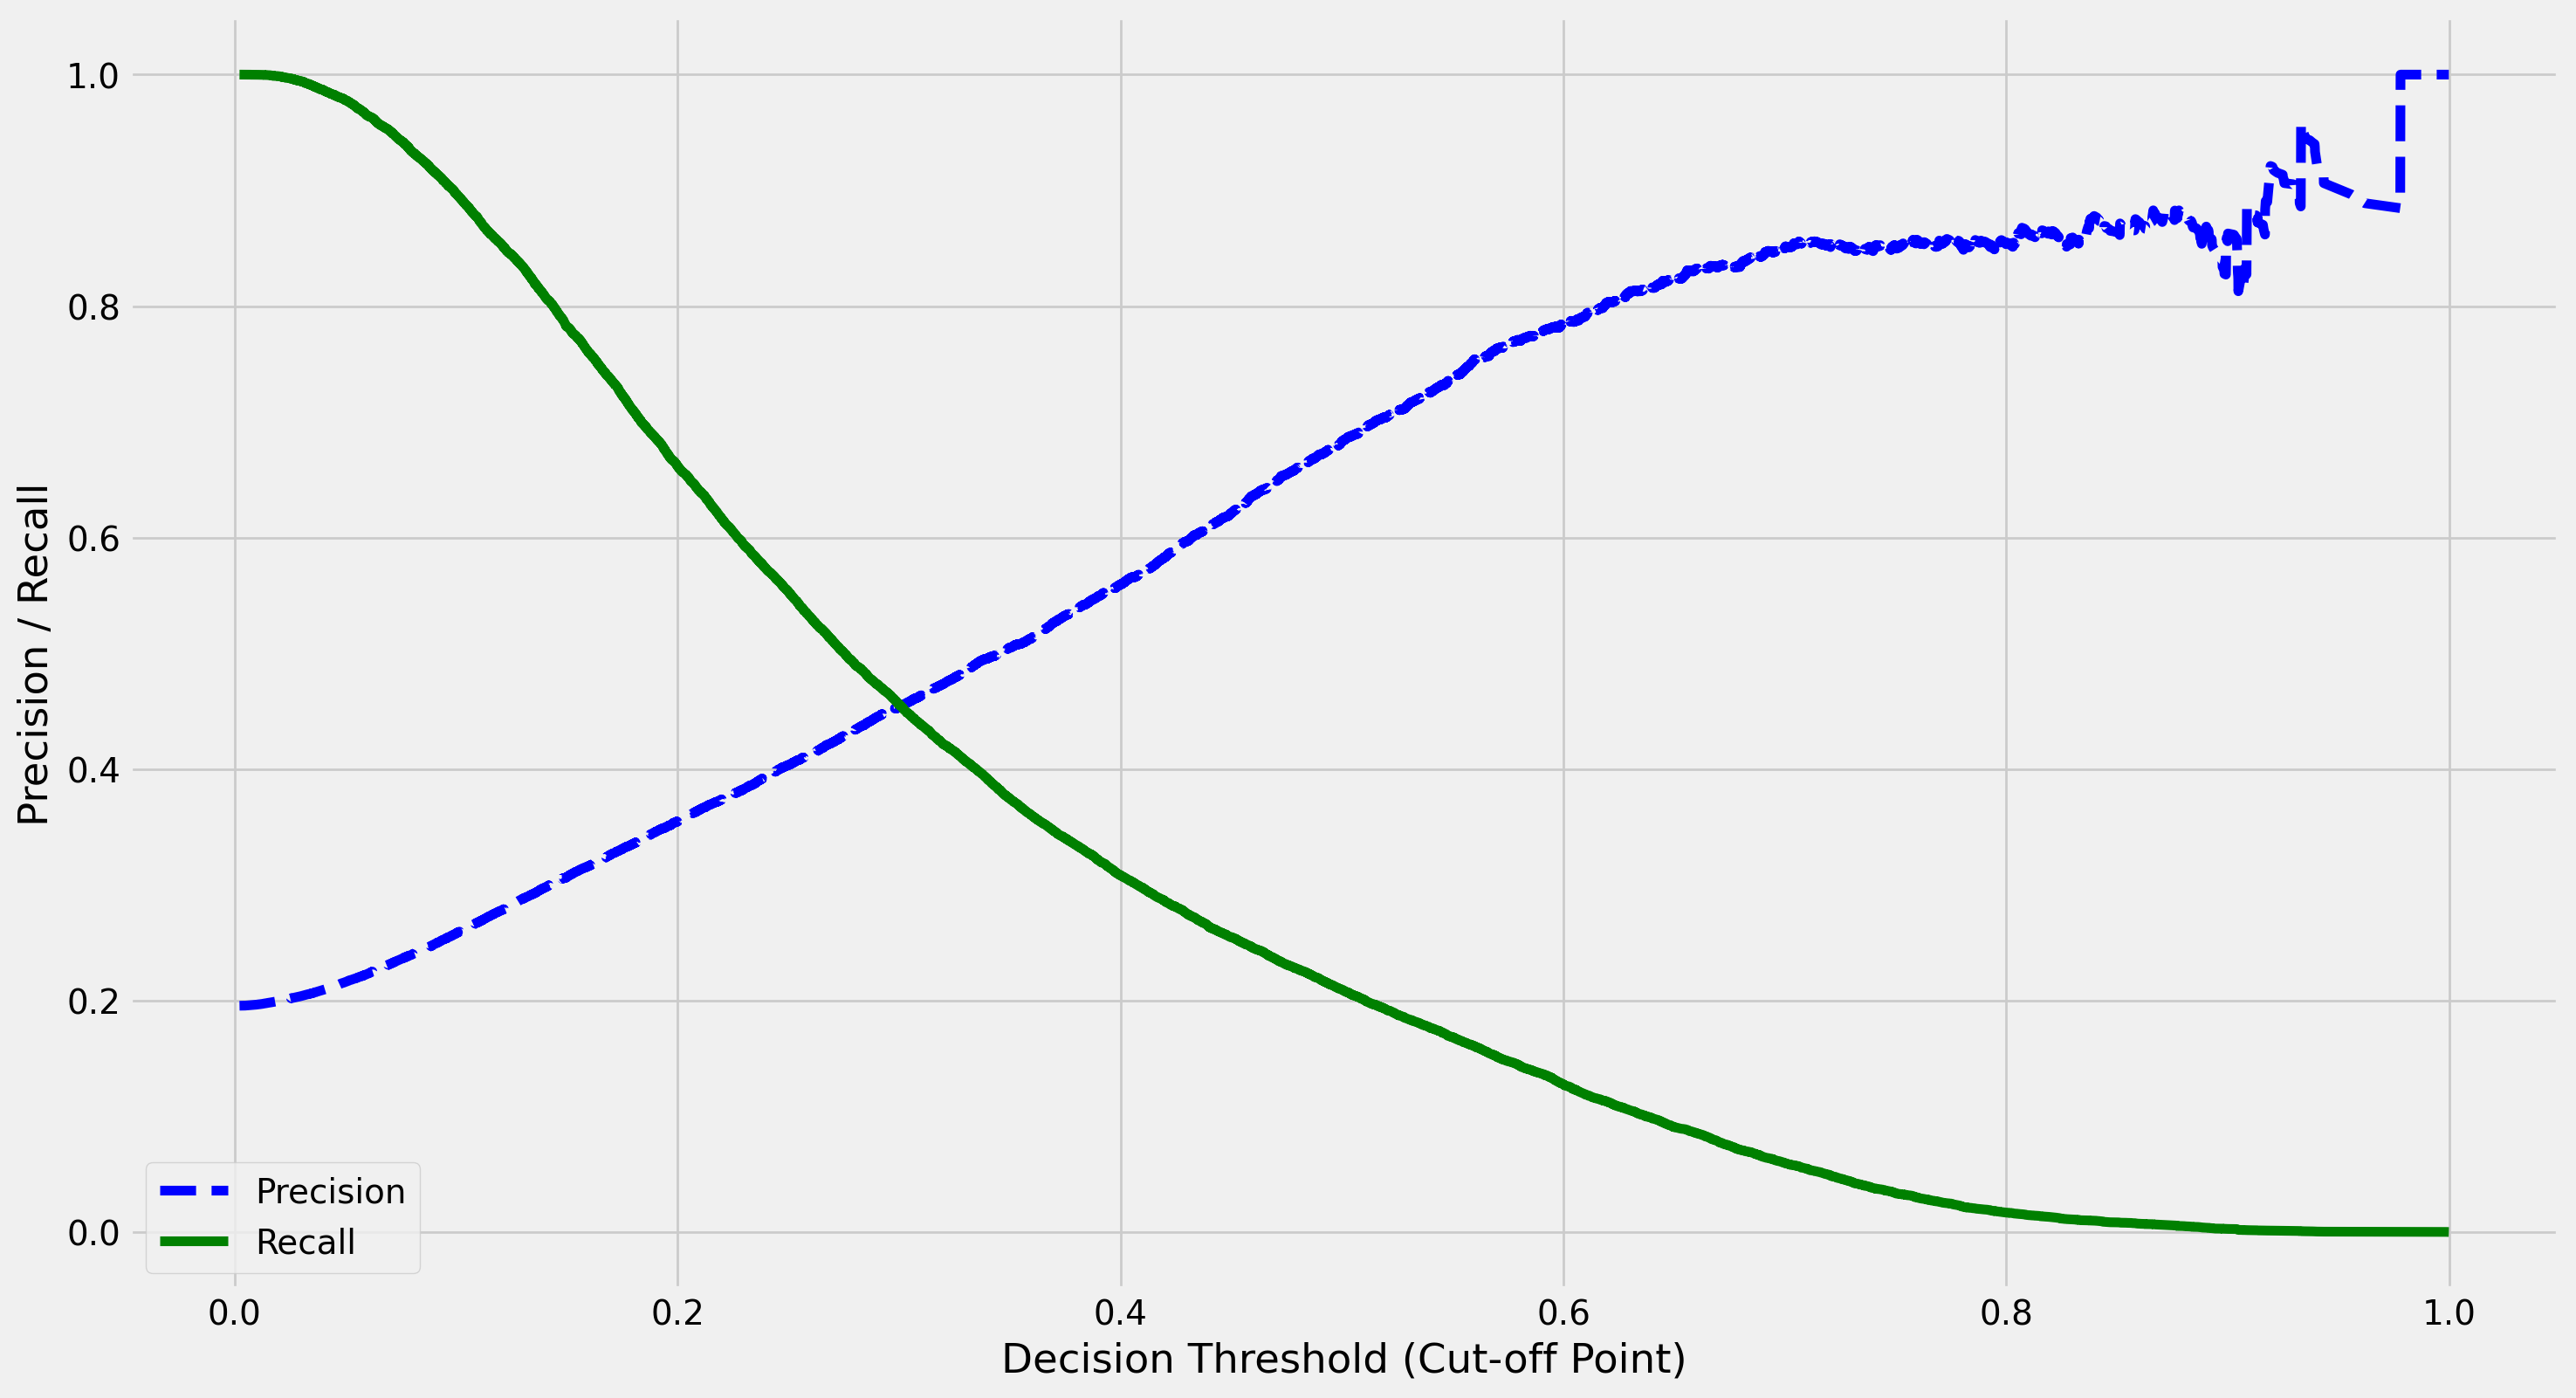

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # highlight the threshold and add the legend, axis label, and grid
    plt.legend()
    plt.xlabel('Decision Threshold (Cut-off Point)')
    plt.ylabel('Precision / Recall')
plot_precision_recall_vs_threshold(precision, recall, threshold)

In [75]:
from joblib import dump, load

💡 First, create a folder called "models" in the file explorer.

In [80]:
import os
from joblib import dump

# Create and train the model
model = LogisticRegression()
# ... model training code ...

# Save the model
os.makedirs('models', exist_ok=True)
dump(model, 'models/model_logisticRegression.dump')


['models/model_logisticRegression.dump']

In [81]:
# Loading a model
model = load('models/model_logisticRegression.dump')

# Appendix: Template Codes for "Standardizing the Features"

---
## When it's benefiical to use 'StandardScaler'
- Before K-Nearest Neighbor (KNN)
- Before Support Vector Machine (SVM)
- Before Clustering (K-Mean)

## Example Codes

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
# Transform the numerical features and store into the new variable 'arrays_of_transformed_values'
std_scaler = StandardScaler()
arrays_of_transformed_values = std_scaler.fit_transform(df[features_numeric])

# Convert the new variable into Data Frame with the column names
df_transformed_values = pd.DataFrame(arrays_of_transformed_values)

# Create Column Names, so that now each column is '[original_colname] + _std'
# For example, 'age' -> 'age_std'
new_colnames = [str(c) + '_std' for c in features_numeric]

# Assign the new column names
df_transformed_values.columns = new_colnames

df = pd.concat([df, df_transformed_values], axis=1, sort=False)

---

## Demystifying "Standard Scaler "

> Replicating the StandardScaler without using package (For your info: What StandardScaler does)

In [84]:
list_of_transformed_values = []

for col in features_numeric:
    mean = df[col].mean()
    std = df[col].std()

    newcol =  (df[col] - mean) / std
    list_of_transformed_values.append(newcol)


df_manual = pd.DataFrame(list_of_transformed_values)
df_manual = df_manual.transpose()
df_manual.head(10)

,Tranc_Year,flat_type_numerized,floor_area_sqm,storey_relative,age_approx,Mall_Nearest_Distance,Mall_Within_1km,Hawker_Nearest_Distance,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
0,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
1,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
2,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
3,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
4,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
5,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
6,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
7,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
8,-0.539903,-1.197795,-1.521017,0.601999,0.529483,0.897626,-0.552998,-0.914355,1.512899,1.046717,-0.452267,0.467604
9,-0.539903,-1.197795,-1.193763,-1.083872,0.941252,0.753372,-0.552998,-0.915681,0.345265,1.793918,0.070329,0.756187
